### Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
#FOR SCALLING 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#FOR VIF CALCULATION 

from statsmodels.stats.outliers_influence import variance_inflation_factor
# FOR R2 EVALUATION 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#sklearn package for liner regression
from sklearn.linear_model import LinearRegression
# Importing RFE and LinearRegression and logistic Regression 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
# Running Your First Training Model
import statsmodels.api as sm  
# For confusion matrix 
from sklearn import metrics
# For Precision score and recall score
from sklearn.metrics import precision_score , recall_score
# For Precision score and recall score tradeoff (curve)
from sklearn.metrics import precision_recall_curve


## READING THE DATA 

In [2]:
df=pd.read_csv("Leads.csv")

In [3]:
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [4]:
df.shape

(9240, 37)

In [5]:
df.columns.tolist()

['Prospect ID',
 'Lead Number',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [6]:
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [7]:
# Check the summary of the dataset

df.describe(include="all")

Prospect ID    Lead Number  \
count                                   9240    9240.000000   
unique                                  9240            NaN   
top     7927b2df-8bba-4d29-b9a2-b6e0beafe620            NaN   
freq                                       1            NaN   
mean                                     NaN  617188.435606   
std                                      NaN   23405.995698   
min                                      NaN  579533.000000   
25%                                      NaN  596484.500000   
50%                                      NaN  615479.000000   
75%                                      NaN  637387.250000   
max                                      NaN  660737.000000   

                    Lead Origin Lead Source Do Not Email Do Not Call  \
count                      9240        9204         9240        9240   
unique                        5          21            2           2   
top     Landing Page Submission      Google           No          No   
freq                       4886        2868         8506        9238   
mean                        NaN         NaN          NaN         NaN   
std                         NaN         NaN          NaN         NaN   
min                         NaN         NaN          NaN         NaN   
25%                         NaN         NaN          NaN         NaN   
50%                         NaN         NaN          NaN         NaN   
75%                         NaN         NaN          NaN         NaN   
max                         NaN         NaN          NaN         NaN   

          Converted  TotalVisits  Total Time Spent on Website  \
count   9240.000000  9103.000000                  9240.000000   
unique          NaN          NaN                          NaN   
top             NaN          NaN                          NaN   
freq            NaN          NaN                          NaN   
mean       0.385390     3.445238                   487.698268   
std        0.486714     4.854853                   548.021466   
min        0.000000     0.000000                     0.000000   
25%        0.000000     1.000000                    12.000000   
50%        0.000000     3.000000                   248.000000   
75%        1.000000     5.000000                   936.000000   
max        1.000000   251.000000                  2272.000000   

        Page Views Per Visit  ... Get updates on DM Content Lead Profile  \
count            9103.000000  ...                      9240         6531   
unique                   NaN  ...                         1            6   
top                      NaN  ...                        No       Select   
freq                     NaN  ...                      9240         4146   
mean                2.362820  ...                       NaN          NaN   
std                 2.161418  ...                       NaN          NaN   
min                 0.000000  ...                       NaN          NaN   
25%                 1.000000  ...                       NaN          NaN   
50%                 2.000000  ...                       NaN          NaN   
75%                 3.000000  ...                       NaN          NaN   
max                55.000000  ...                       NaN          NaN   

          City Asymmetrique Activity Index Asymmetrique Profile Index  \
count     7820                        5022                       5022   
unique       7                           3                          3   
top     Mumbai                   02.Medium                  02.Medium   
freq      3222                        3839                       2788   
mean       NaN                         NaN                        NaN   
std        NaN                         NaN                        NaN   
min        NaN                         NaN                        NaN   
25%        NaN                         NaN                        NaN   
50%        NaN                         NaN                  

In [8]:
# checking all the info of the data set like column data types, total entries
df.info()
##from the below the information we can see that there are 7 numerical variables and rest 30 are categorical variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## CHECKINNG FOR NULL VALUES IN PERCENTAGE 

In [9]:
null_perc_1=round(100*(df.isnull().sum()/len(df.index)), 2)
null_perc_1

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
# Since looking at the Data Frame there were places where "Select" was used we have to check that rows.
df[df["Lead Profile"]=="Select"]

Prospect ID  Lead Number  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1     2a272436-5132-4136-86fa-dcc88c88f482       660728   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4     3256f628-e534-4826-9d63-4a8b88782852       660681   
10    2a369e35-ca95-4ca9-9e4f-9d27175aa320       660608   
...                                    ...          ...   
9183  bc77b8ab-253a-443d-802b-d023f8f44ef8       580017   
9221  b92509cd-7f4c-414e-a8af-eb9cf0c89da7       579767   
9226  c3bb1471-53d5-4244-b2e5-4bbb543835c1       579735   
9228  40d3b3cf-d939-49ff-bea5-60e8d4025104       579717   
9233  3f715465-2546-47cd-afa8-8b8dc63b8b43       579622   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
3     Landing Page Submission  Direct Traffic           No          No   
4     Landing Page Submission          Google           No          No   
10    Landing Page Submission  Organic Search           No          No   
...                       ...             ...          ...         ...   
9183                      API          Google           No          No   
9221  Landing Page Submission          Google           No          No   
9226                      API      Olark Chat           No          No   
9228  Landing Page Submission          Google           No          No   
9233                      API  Direct Traffic           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
3             0          1.0                          305   
4             1          2.0                         1428   
10            1          8.0                         1351   
...         ...          ...                          ...   
9183          0          4.0                          952   
9221          0          4.0                         1347   
9226          0          0.0                            0   
9228          1          4.0                         1944   
9233          1         13.0                         1409   

      Page Views Per Visit  ... Get updates on DM Content Lead Profile  \
0                      0.0  ...                        No       Select   
1                      2.5  ...                        No       Select   
3                      1.0  ...                        No       Select   
4                      1.0  ...                        No       Select   
10                     8.0  ...                        No       Select   
...                    ...  ...                       ...          ...   
9183                   2.0  ...                        No       Select   
9221                   2.0  ...                        No       Select   
9226                   0.0  ...                        No       Select   
9228                   2.0  ...                        No       Select   
9233                   2.6  ...                        No       Select   

                    City Asymmetrique Activity Index  \
0                 Select                   02.Medium   
1                 Select                   02.Medium   
3                 Mumbai                   02.Medium   
4                 Mumbai                   02.Medium   
10    Other Metro Cities                   02.Medium   
...                  ...                         ...   
9183              Select                         NaN   
9221              Mumbai                         NaN   
9226              Select                     01.High   
9228              Mumbai                         NaN   
9233              Select                         NaN   

     Asymmetrique Profile Index Asymmetrique Activity Score  \
0                     02.Medium                        15.0   
1           

## There are values in the columns which says "Select" we need to replace them with NaN and then check for null values

In [11]:
## Replacing "Select" with nan
df=df.replace("Select",np.nan)

In [12]:
null_perc=round(100*(df.isnull().sum()/len(df.index)), 2)
null_perc

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

## Comparing both the null values for better understanding by puting them in data frame

In [13]:
perc_df = pd.DataFrame({'Before': null_perc_1 , 'After': null_perc})
perc_df

Before  After
Prospect ID                                      0.00   0.00
Lead Number                                      0.00   0.00
Lead Origin                                      0.00   0.00
Lead Source                                      0.39   0.39
Do Not Email                                     0.00   0.00
Do Not Call                                      0.00   0.00
Converted                                        0.00   0.00
TotalVisits                                      1.48   1.48
Total Time Spent on Website                      0.00   0.00
Page Views Per Visit                             1.48   1.48
Last Activity                                    1.11   1.11
Country                                         26.63  26.63
Specialization                                  15.56  36.58
How did you hear about X Education              23.89  78.46
What is your current occupation                 29.11  29.11
What matters most to you in choosing a course   29.32  29.32
Search                                           0.00   0.00
Magazine                                         0.00   0.00
Newspaper Article                                0.00   0.00
X Education Forums                               0.00   0.00
Newspaper                                        0.00   0.00
Digital Advertisement                            0.00   0.00
Through Recommendations                          0.00   0.00
Receive More Updates About Our Courses           0.00   0.00
Tags                                            36.29  36.29
Lead Quality                                    51.59  51.59
Update me on Supply Chain Content                0.00   0.00
Get updates on DM Content                        0.00   0.00
Lead Profile                                    29.32  74.19
City                                            15.37  39.71
Asymmetrique Activity Index                     45.65  45.65
Asymmetrique Profile Index                      45.65  45.65
Asymmetrique Activity Score                     45.65  45.65
Asymmetrique Profile Score                      45.65  45.65
I agree to pay the amount through cheque         0.00   0.00
A free copy of Mastering The Interview           0.00   0.00
Last Notable Activity                            0.00   0.00

- There has been a considerable rise in the null values of "LEAD PROFILE" AND "CITY"

In [14]:
# Since we need Few columns such as Specialization we will be considering droping values  more than 40%
null_perc[null_perc >=40]

How did you hear about X Education    78.46
Lead Quality                          51.59
Lead Profile                          74.19
Asymmetrique Activity Index           45.65
Asymmetrique Profile Index            45.65
Asymmetrique Activity Score           45.65
Asymmetrique Profile Score            45.65
dtype: float64

###  We are Droping columns :
- Since these columns seems to be not of utter importance "Prospect_id" is just uniqueId given to indvividuals 
- While the others did not provide information which was essetial for building a model
- We Can drop City and same goes for country
- We can drop Tag since be of major assistance 


In [15]:
## DROPING A FEW OTHER COLUMN WHICH SEEMS TO BE OF LEAST IMPORTANCE 
drop_columns=["Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque","Prospect ID",
              "Do Not Email","Do Not Call","Lead Number","City","Country","Tags"]

In [16]:
# Removing all the columns that are no required and have 35% and above  null values
drop_columns_1=["How did you hear about X Education","Lead Quality","Lead Profile","Lead Quality","Asymmetrique Activity Index",
              "Asymmetrique Profile Index","Asymmetrique Activity Score","Asymmetrique Profile Score"]

In [17]:
leads=df.copy()

In [18]:
leads=leads.drop(drop_columns,axis=1)

In [19]:
leads=leads.drop(drop_columns_1,axis=1)

In [20]:
leads.shape

(9240, 20)

In [21]:
# Rechecking the percentage of missing values
null_perc_2=round(100*(leads.isnull().sum()/len(leads.index)), 2)

In [22]:
null_perc_2[null_perc_2>0]

Lead Source                                       0.39
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
dtype: float64

- As per the data 3 columns have data if we remove the rows will cost us a huge amount of data . So we will have to replace these values with some appropriate name.

### Filling the missing values for 6 Columns

In [23]:
#leads["Country"]=leads["Country"].fillna("Missing_country")

In [24]:
leads["Specialization"]=leads["Specialization"].fillna("Missing_Spec")

In [25]:
leads["What is your current occupation"]=leads["What is your current occupation"].fillna("Missing_Occup")

In [26]:
leads["What matters most to you in choosing a course"]=leads["What matters most to you in choosing a course"].fillna("Missing_matter")

In [27]:
#leads["Tags"]=leads["Tags"].fillna("Missing_Tags")

In [28]:
#leads["City"]=leads["City"].fillna("Missing_City")

In [29]:
leads.Specialization.value_counts()

Missing_Spec                         3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [30]:
## REMOVING ROWS WITH LESS PERCENTAGE OF MISSING VALUES 

In [31]:
leads = leads[~pd.isnull(leads['Lead Source'])]


In [32]:
leads = leads[~pd.isnull(leads['TotalVisits'])]


In [33]:
leads = leads[~pd.isnull(leads['Page Views Per Visit'])]

In [34]:
leads = leads[~pd.isnull(leads['Last Activity'])]

In [35]:
null_perc_final=round(100*(leads.isnull().sum()/len(leads.index)), 2)

In [36]:
null_perc_final

Lead Origin                                      0.0
Lead Source                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                          0.0
Receive More Updates About Our Courses           0.0
A free copy of Mastering The Interview        

- Data is clean and now we can me further for EDA

<---------------

## PERFORMING EDA


- For categorical variables, we'll analyse the count/percentage plots.
- For numerical variable, we'll describe the variable and analyse the box plots.

In [37]:
leads.shape

(9074, 20)

In [38]:
## FOR CATEGORICAL COLUMNS:

In [39]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Converted                                      9074 non-null   int64  
 3   TotalVisits                                    9074 non-null   float64
 4   Total Time Spent on Website                    9074 non-null   int64  
 5   Page Views Per Visit                           9074 non-null   float64
 6   Last Activity                                  9074 non-null   object 
 7   Specialization                                 9074 non-null   object 
 8   What is your current occupation                9074 non-null   object 
 9   What matters most to you in choosing a course  9074 

In [40]:
leads["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6370
Missing_matter               2702
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [41]:
leads.select_dtypes(include='object')

Lead Origin     Lead Source            Last Activity  \
0                         API      Olark Chat  Page Visited on Website   
1                         API  Organic Search             Email Opened   
2     Landing Page Submission  Direct Traffic             Email Opened   
3     Landing Page Submission  Direct Traffic              Unreachable   
4     Landing Page Submission          Google        Converted to Lead   
...                       ...             ...                      ...   
9235  Landing Page Submission  Direct Traffic        Email Marked Spam   
9236  Landing Page Submission  Direct Traffic                 SMS Sent   
9237  Landing Page Submission  Direct Traffic                 SMS Sent   
9238  Landing Page Submission          Google                 SMS Sent   
9239  Landing Page Submission  Direct Traffic                 SMS Sent   

                 Specialization What is your current occupation  \
0                  Missing_Spec                      Unemployed   
1                  Missing_Spec                      Unemployed   
2       Business Administration                         Student   
3         Media and Advertising                      Unemployed   
4                  Missing_Spec                      Unemployed   
...                         ...                             ...   
9235     IT Projects Management                      Unemployed   
9236      Media and Advertising                      Unemployed   
9237    Business Administration                      Unemployed   
9238  Human Resource Management                   Missing_Occup   
9239    Supply Chain Management                      Unemployed   

     What matters most to you in choosing a course Search Magazine  \
0                          Better Career Prospects     No       No   
1                          Better Career Prospects     No       No   
2                          Better Career Prospects     No       No   
3                          Better Career Prospects     No       No   
4                          Better Career Prospects     No       No   
...                                            ...    ...      ...   
9235                       Better Career Prospects     No       No   
9236                       Better Career Prospects     No       No   
9237                       Better Career Prospects     No       No   
9238                                Missing_matter     No       No   
9239                       Better Career Prospects     No       No   

     Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                   No                 No        No                    No   
1                   No                 No        No                    No   
2                   No                 No        No                    No   
3                   No                 No        No                    No   
4                   No                 No        No                    No   
...                ...                ...       ...                   ...   
9235                No                 No        No                    No   
9236                No                 No        No                    No   
9237                No                 No        No                    No   
9238                No                 No        No                    No   
9239                No                 No        No                    No   

     Through Recommendations Receive More Updates About Our Courses  \
0                         No                                     No   
1                         No                                     No   
2                         No                                     No   
3                         No                                     No   
4                         No                                     No   
...                      ...                                    ...   
9235                      No                                 

In [42]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [43]:
cat_col=["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation","What matters most to you in choosing a course",
        "Search","Magazine","Newspaper Article","Newspaper Article","Newspaper","Digital Advertisement","Through Recommendations",
        "Receive More Updates About Our Courses","A free copy of Mastering The Interview","Last Notable Activity","X Education Forums"]

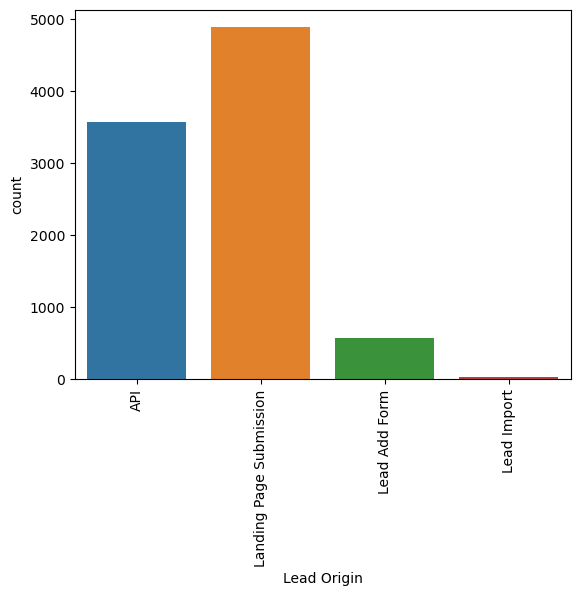

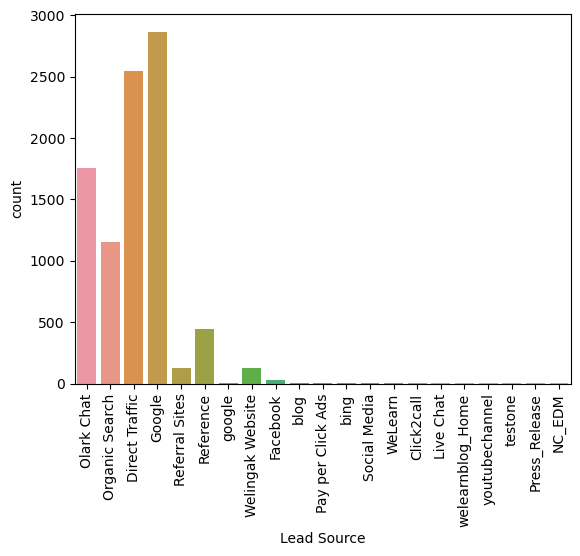

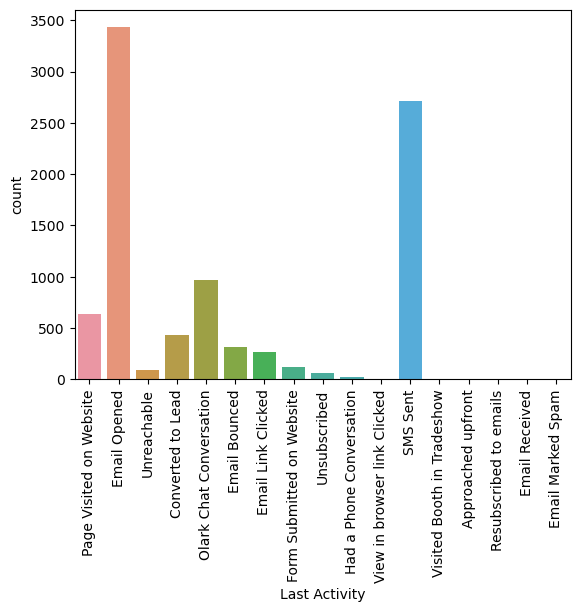

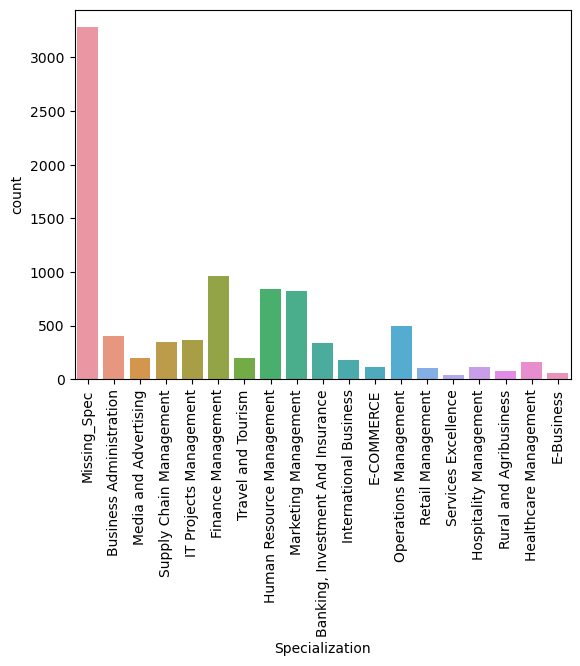

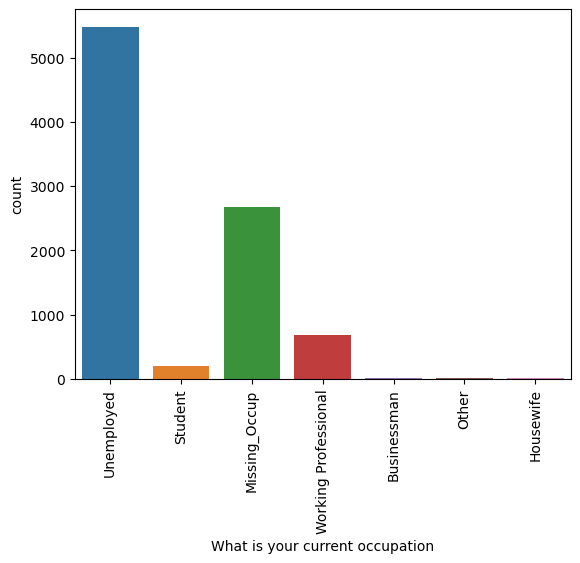

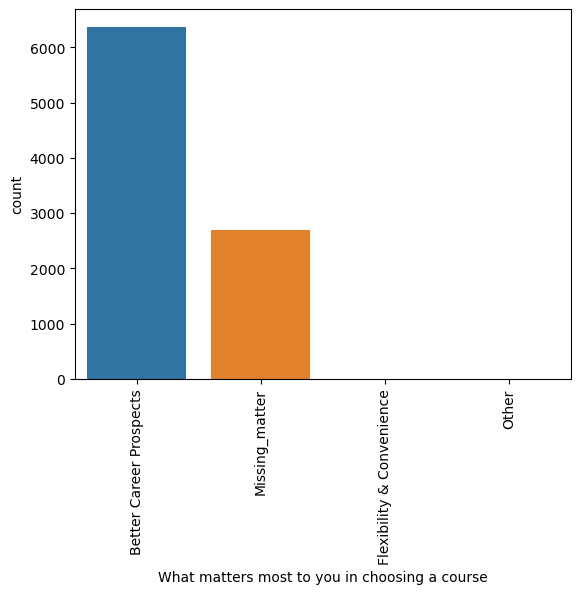

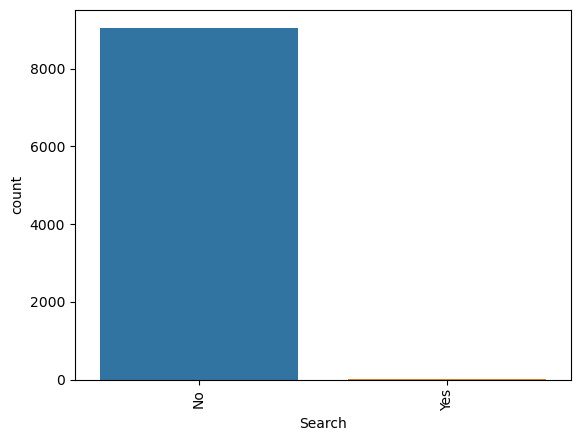

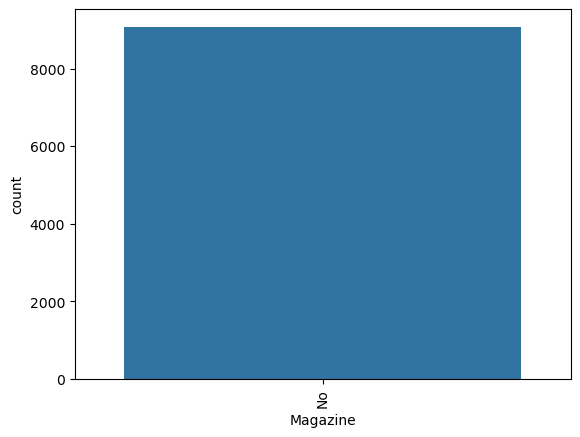

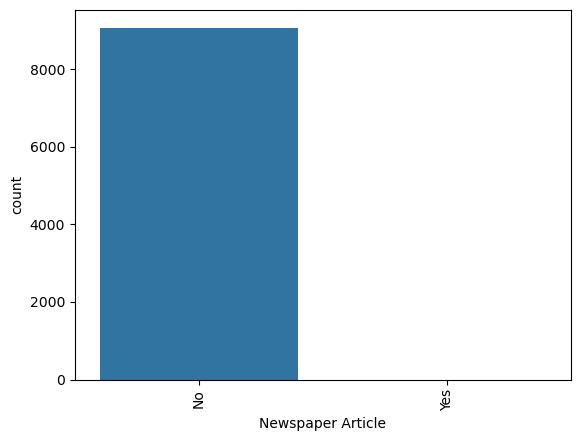

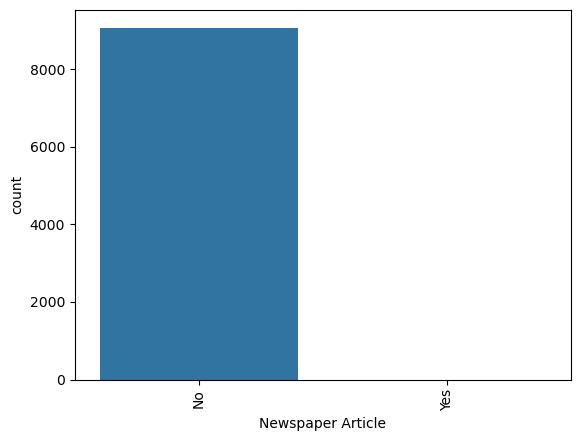

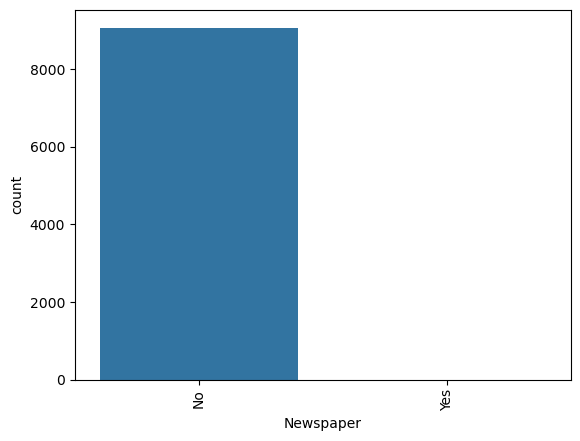

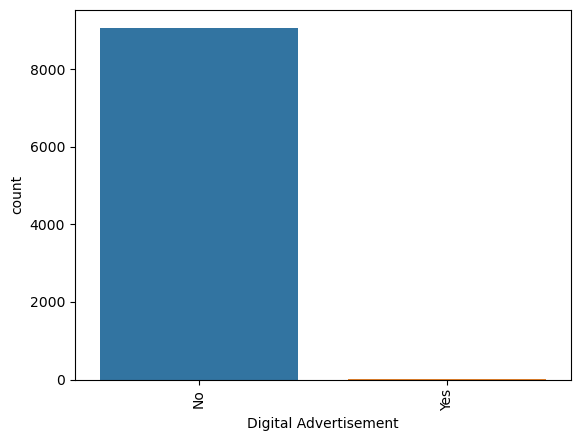

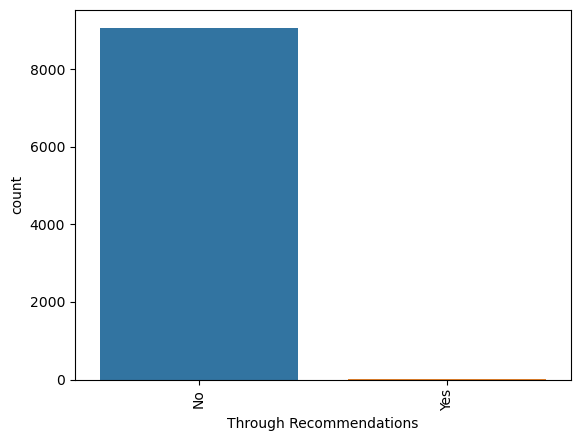

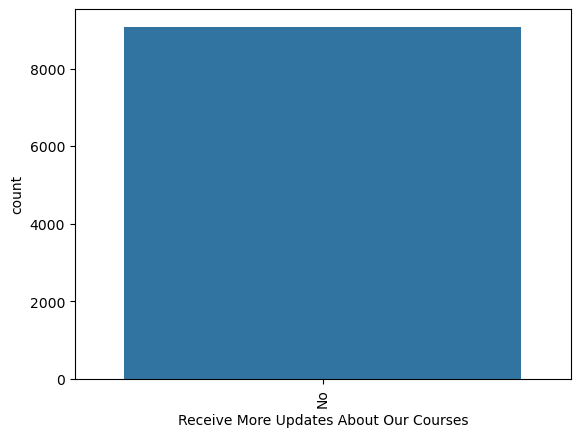

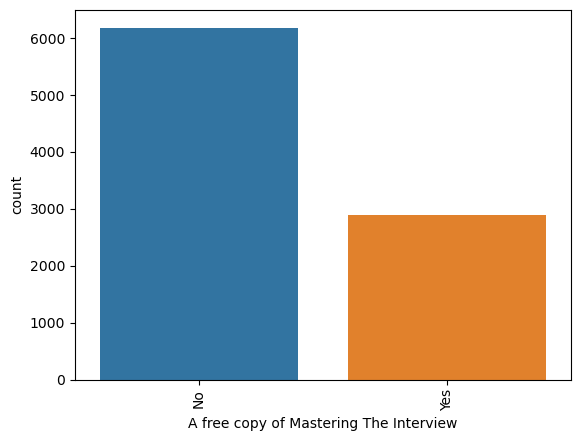

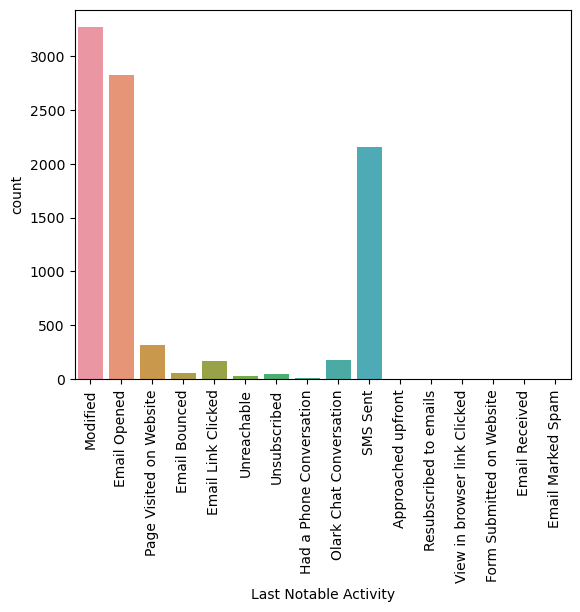

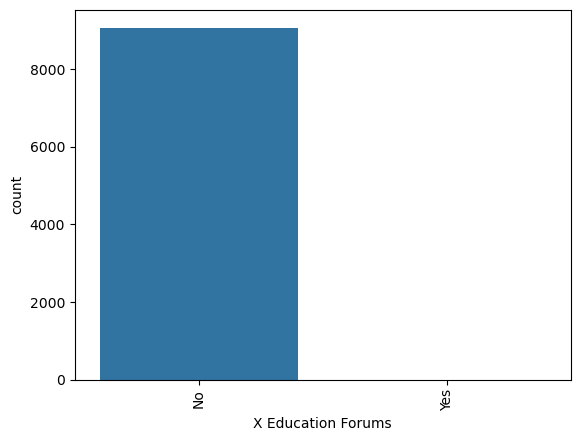

In [44]:
for i in cat_col:
    sns.countplot(leads[i])
    plt.xticks(rotation=90)
    plt.show()

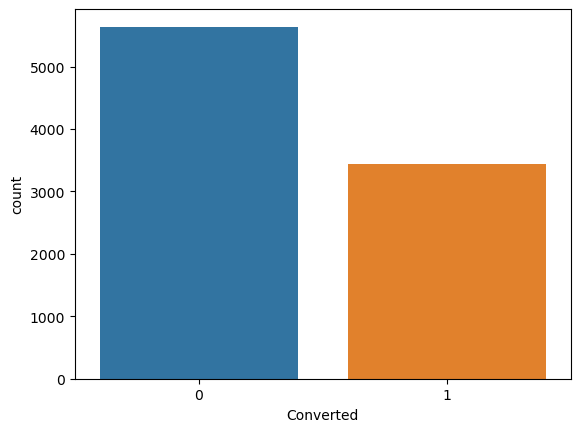

In [45]:
sns.countplot(leads['Converted'])
plt.show()

- Conclusion:- 
- With this plot we came to conclusion that we can drop a few columns with one unique variable "Magazine","Receive More Updates about Our Courses"
- More than 50% of the people have converted 
- Lead Source is "Google"
- Most Promisiing last activity is either Opening an E-mail or is SMS
- lead Coutry is India , However there is a massicve croud which has not specified anything.
- Fianace . HR , Marketing and Operations are the few which have high scale , however a majority of people have not specfied their specilization
- Unemployed People are likely to search more alojng with people for Better Career Prospects 
- Mumbai is the city where major students enroll
- Mangzine,Newspaper Article,Newspaper,Digital Agvertisiment,Through Recommendations,Receive More Updates About Our Courses these can be droped


In [46]:
leads.select_dtypes(include=['int',"float"])

Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit  
0                     0.00  
1                     2.50  
2                     2.00  
3                     1.00  
4                     1.00  
...                    ...  
9235                  2.67  
9236                  2.00  
9237                  2.00  
9238                  3.00  
9239                  3.00  

[9074 rows x 4 columns]

In [47]:
num_col=["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]

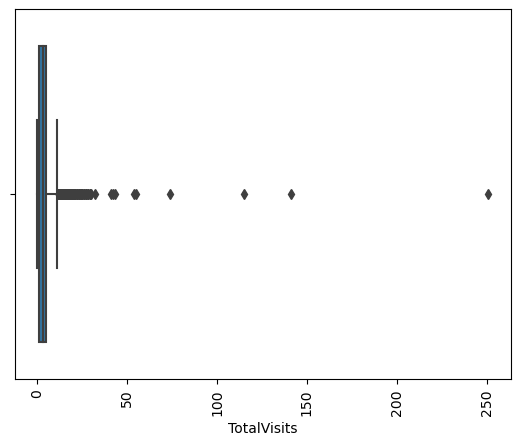

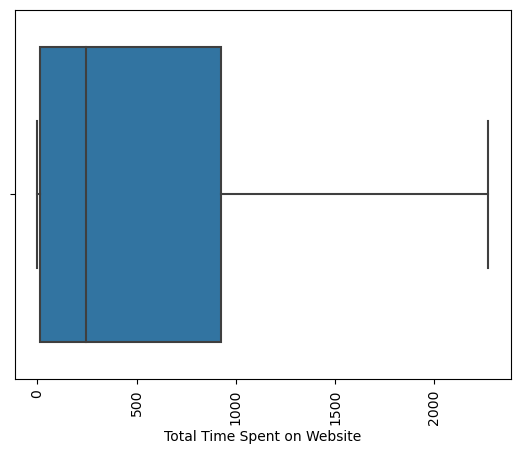

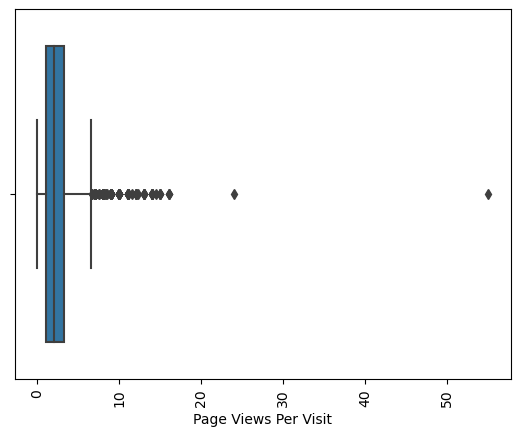

In [48]:
for i in num_col:
    sns.boxplot(leads[i])
    plt.xticks(rotation=90)
    plt.show()

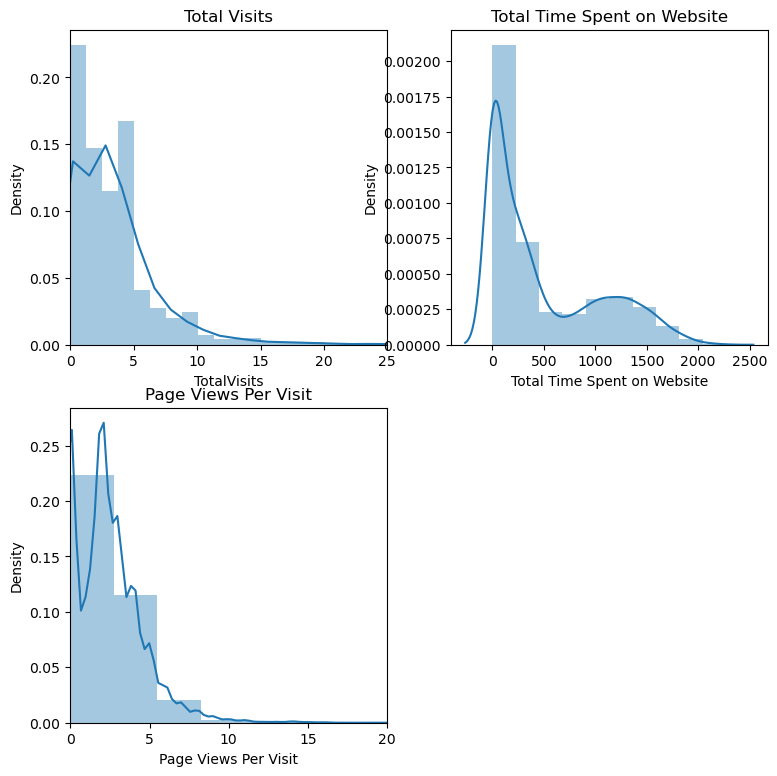

In [49]:
plt.figure(figsize = (9,9))
plt.subplot(221)
sns.distplot(leads['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
sns.distplot(leads['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
sns.distplot(leads['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

### Handling Outliers
- Lets look at the respective percentile values and check if we can see if there is any sudden increase in the frequency

In [50]:
numeric = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9074.000000                  9074.000000           9074.000000
mean      3.456028                   482.887481              2.370151
std       4.858802                   545.256560              2.160871
min       0.000000                     0.000000              0.000000
25%       1.000000                    11.000000              1.000000
50%       3.000000                   246.000000              2.000000
75%       5.000000                   922.750000              3.200000
90%       7.000000                  1373.000000              5.000000
99%      17.000000                  1839.000000              9.000000
max     251.000000                  2272.000000             55.000000

- There is no sudden increase so in my opinion there is no need to handle outliers  

## <---------------------------------------------------------------------------->

## BI VARIANTE ANALYSIS 


###  Since Converted is out traget varible we will include all catagorical and numerical varibale 

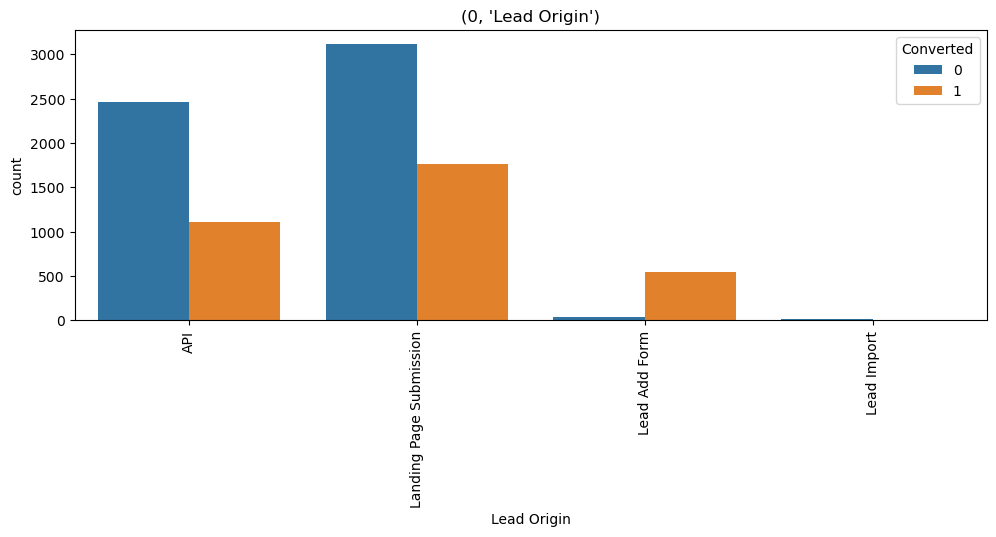

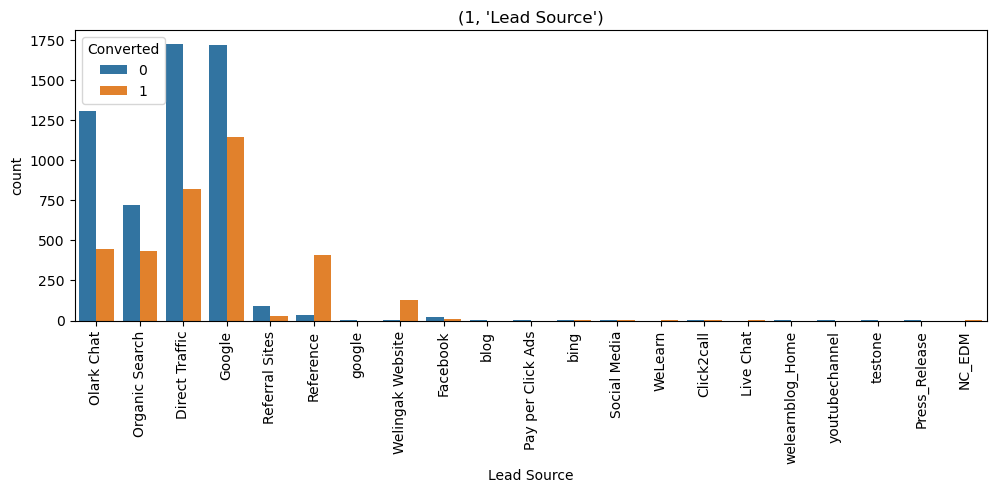

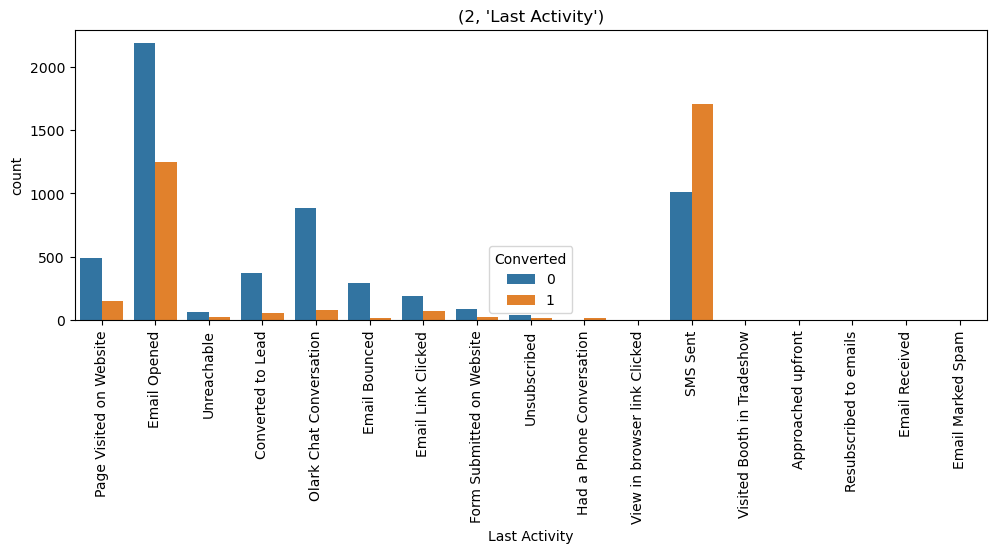

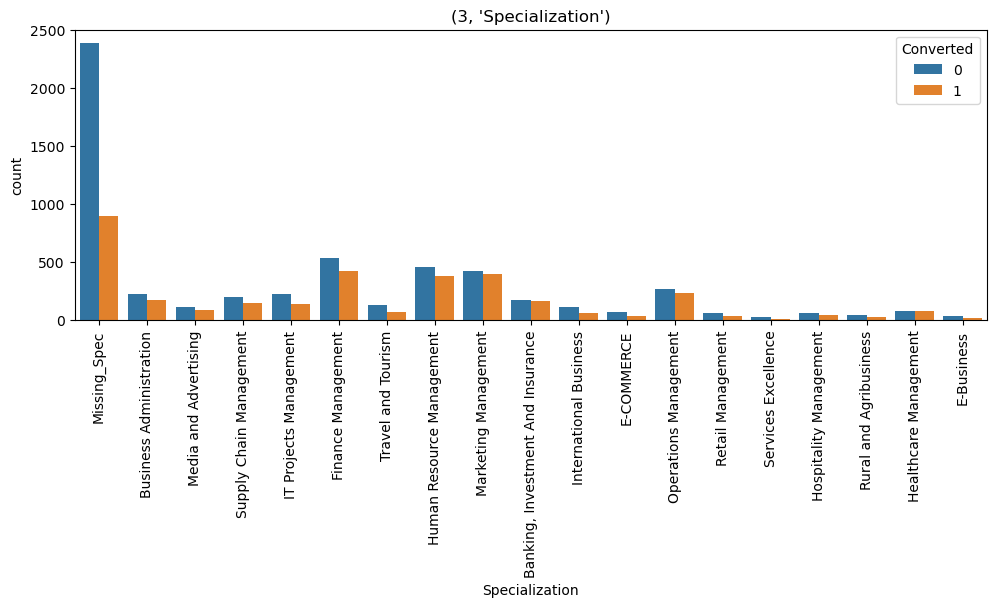

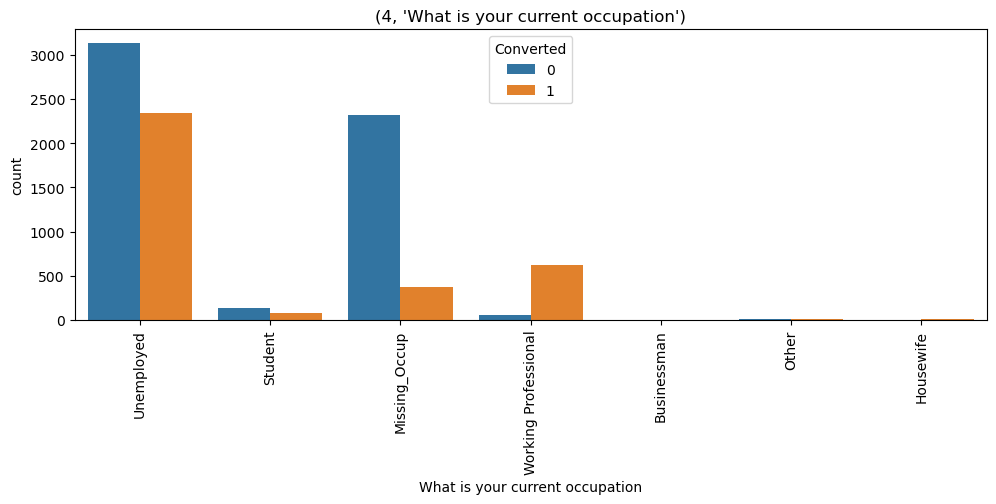

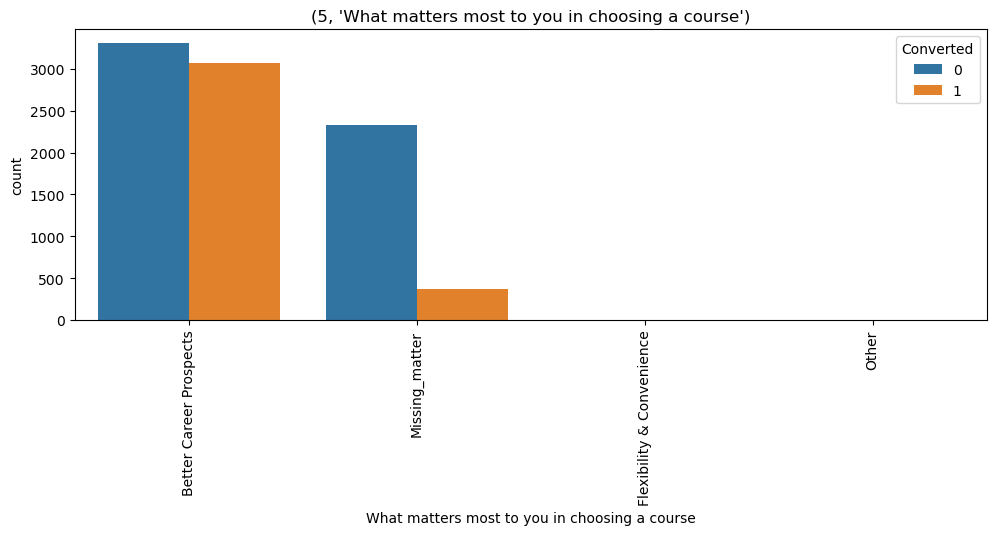

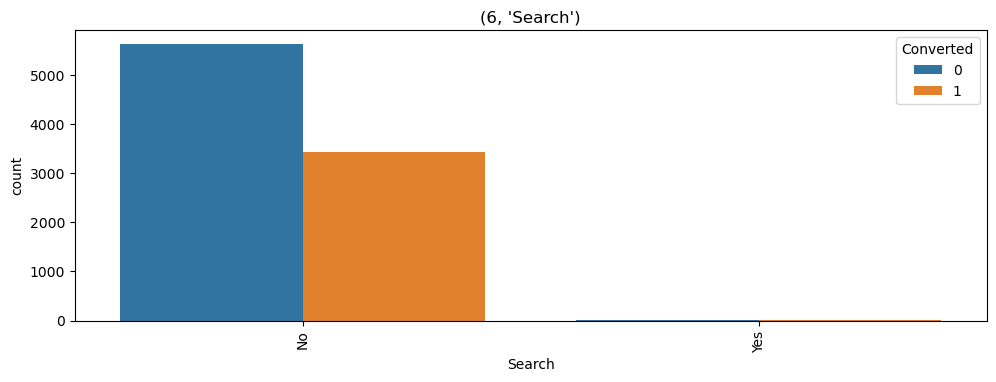

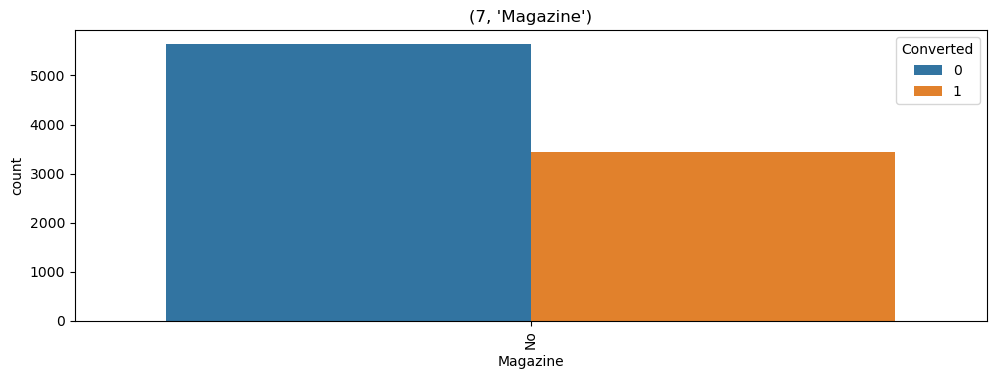

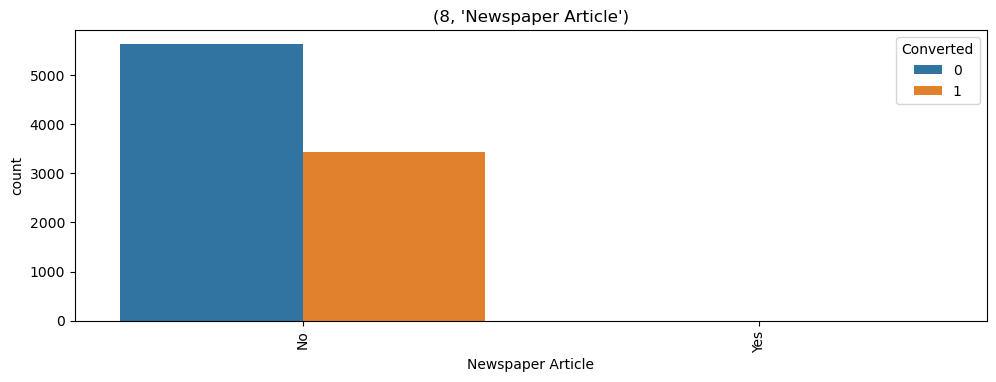

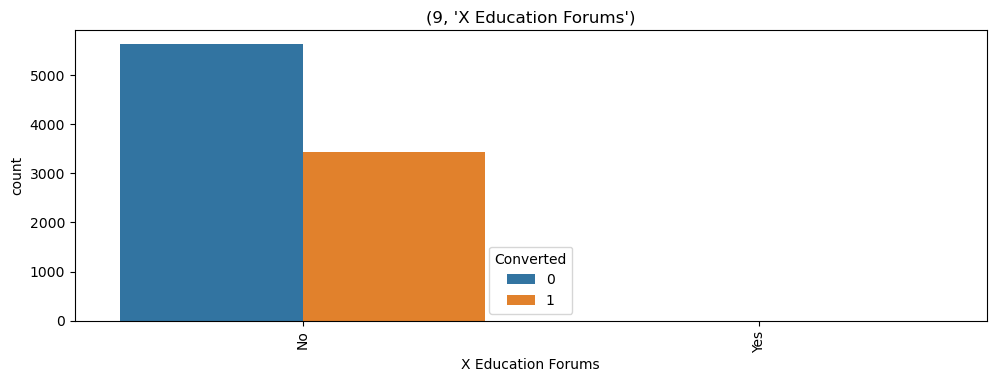

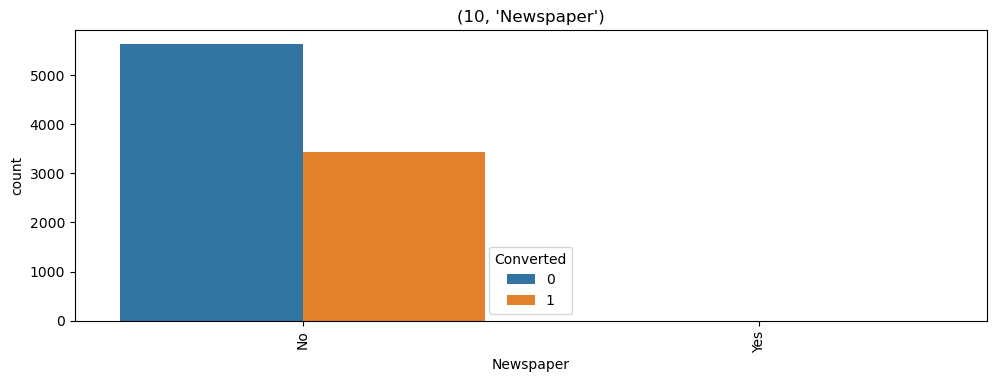

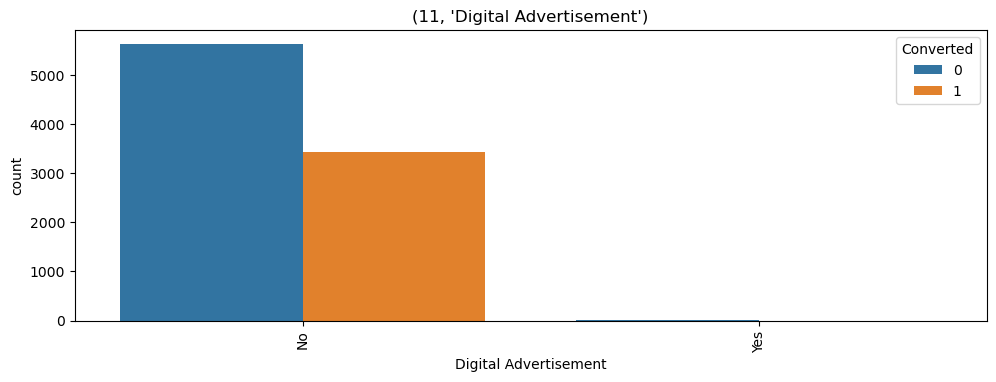

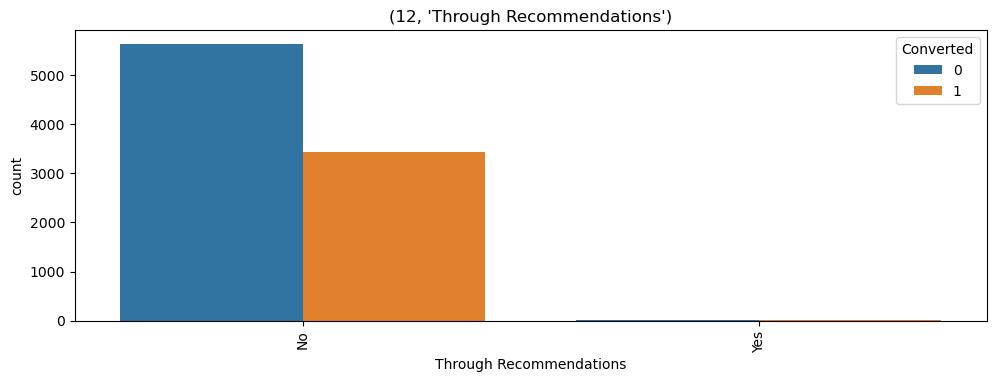

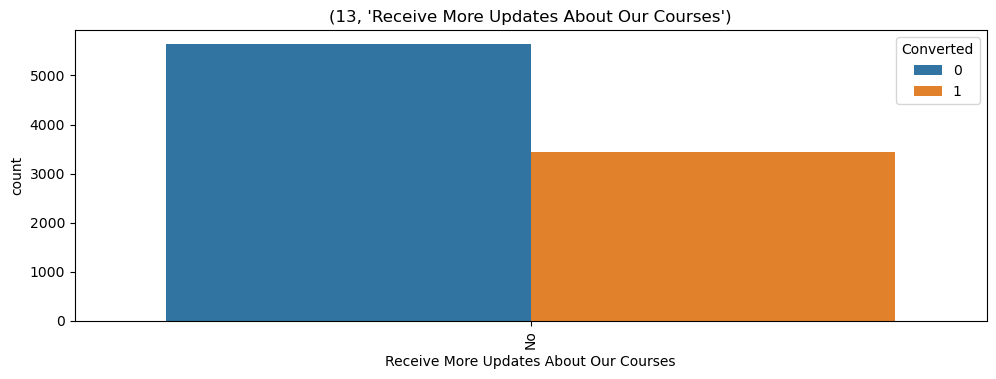

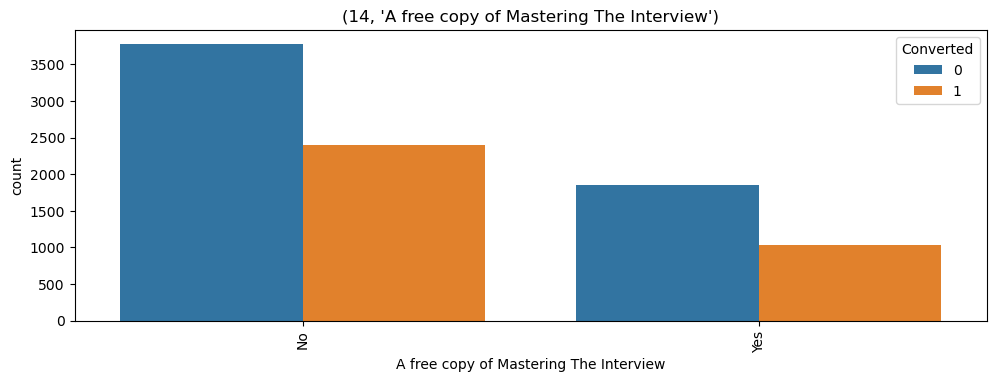

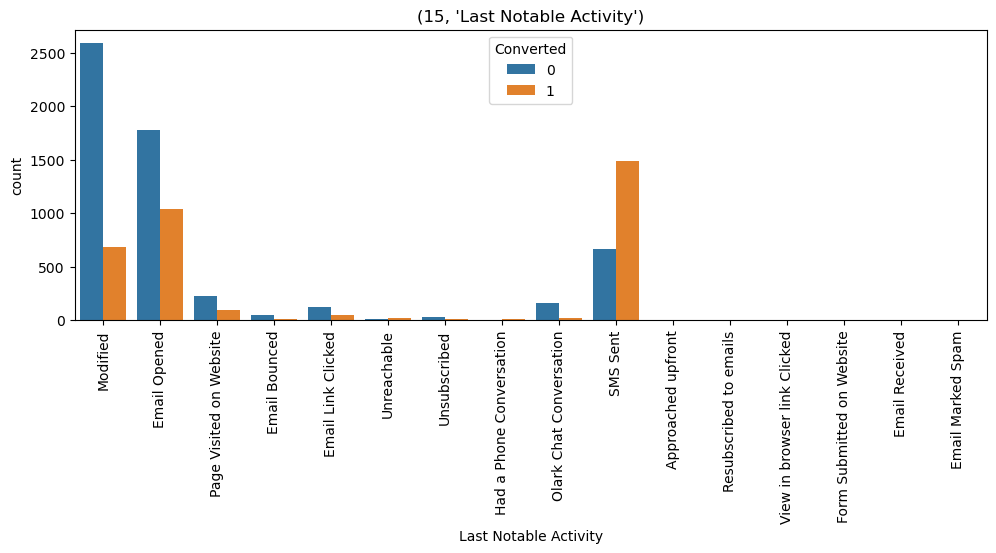

In [51]:
cat_col=["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation","What matters most to you in choosing a course",
        "Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations",
        "Receive More Updates About Our Courses","A free copy of Mastering The Interview","Last Notable Activity"]
#plt.figure(figsize=(10,10))
for i in enumerate(cat_col):
    plt.figure(figsize=(40,40))
    plt.subplot(9,3,i[0]+1)
    plt.title(i)

    sns.countplot(data=leads, x=i[1],hue="Converted")
    plt.xticks(rotation=90)

plt.show()

### Conclusion
- From Lead Origin it can be seen that the maximum conversion happened from Landing Page Submission
- From Lead Source It can be seen that Google Search landed the maximum conversion 
- From Last Activity SMS Sent had more conversion
- From Country India has high rate of conversion
- Finance Management has the high rate of conversion 
- More conversion happend with people who are unemployed.
- Better Career Prospects is the leading cause of conversion 
- Conversion rate is high on leads who are not through search
- Since "Newspaper Article" column now has only one value for all rows - "No" , it is safe to drop this column
- Since "X Education Forums" column now has only one value for all rows - "No" , it is safe to drop this column
- Since Newspaper column has only one row with "Yes" as the value and further since this lead did not get converted and rest  of all the values are "No", we can safely drop the column
- Since "Magazine" column now has only one value for all rows - "No" , it is safe to drop this column
- Since "Newspaper Article","Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses"
- Reverting after reading the email has the most conversion 
- Conversion rate is high on leads who do not want a free copy of Mastering Interviews
- From Last Activity SMS Sent had more conversion




In [52]:
drop_var=["Newspaper Article","X Education Forums","Newspaper","Magazine","Newspaper Article","Digital Advertisement","Through Recommendations"]

## Checking For Numerical Variables:


In [53]:
num_col

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

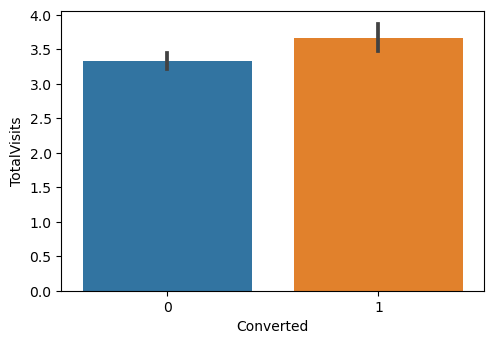

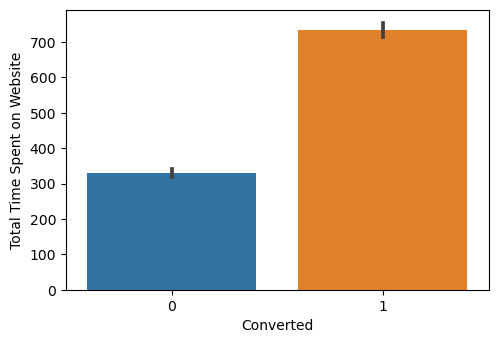

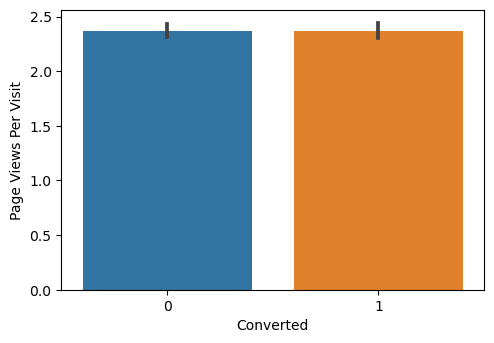

In [54]:
for i in enumerate(num_col) :
    plt.figure(figsize=(12,8))
    plt.subplot(2,2,i[0]+1)
    sns.barplot(y=i[1],x="Converted",data=leads)

### Conclusion 
- The conversion rated were high for Total Visits, Total Time Spent on Website and Page Views Per Visit



In [55]:
#Mangzine,Newspaper Article,Newspaper,Digital Agvertisiment,Through Recommendations,Receive More Updates About Our Courses

In [56]:
## Checking for Co relations :


In [57]:
leads_corr=leads.corr()

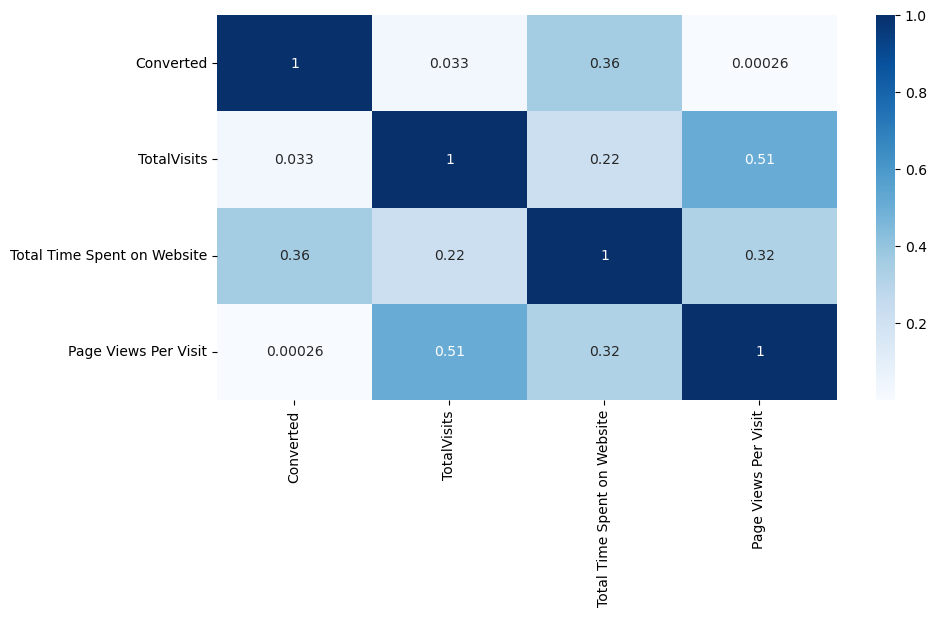

In [58]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(leads.corr(),annot=True,cmap="Blues")
plt.show()

In [59]:
drop_var=["Newspaper Article","X Education Forums","Newspaper","Magazine","Newspaper Article","Digital Advertisement","Through Recommendations"]

In [60]:
leads.shape

(9074, 20)

In [61]:
leads=leads.drop(drop_var,axis=1)

In [62]:
leads.shape

(9074, 14)

In [63]:
leads.head()

Lead Origin     Lead Source  Converted  TotalVisits  \
0                      API      Olark Chat          0          0.0   
1                      API  Organic Search          0          5.0   
2  Landing Page Submission  Direct Traffic          1          2.0   
3  Landing Page Submission  Direct Traffic          0          1.0   
4  Landing Page Submission          Google          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0             Missing_Spec                      Unemployed   
1             Missing_Spec                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4             Missing_Spec                      Unemployed   

  What matters most to you in choosing a course Search  \
0                       Better Career Prospects     No   
1                       Better Career Prospects     No   
2                       Better Career Prospects     No   
3                       Better Career Prospects     No   
4                       Better Career Prospects     No   

  Receive More Updates About Our Courses  \
0                                     No   
1                                     No   
2                                     No   
3                                     No   
4                                     No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

## 3)Dummy Variables 

In [64]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Converted                                      9074 non-null   int64  
 3   TotalVisits                                    9074 non-null   float64
 4   Total Time Spent on Website                    9074 non-null   int64  
 5   Page Views Per Visit                           9074 non-null   float64
 6   Last Activity                                  9074 non-null   object 
 7   Specialization                                 9074 non-null   object 
 8   What is your current occupation                9074 non-null   object 
 9   What matters most to you in choosing a course  9074 

In [65]:
leads.head()

Lead Origin     Lead Source  Converted  TotalVisits  \
0                      API      Olark Chat          0          0.0   
1                      API  Organic Search          0          5.0   
2  Landing Page Submission  Direct Traffic          1          2.0   
3  Landing Page Submission  Direct Traffic          0          1.0   
4  Landing Page Submission          Google          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0             Missing_Spec                      Unemployed   
1             Missing_Spec                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4             Missing_Spec                      Unemployed   

  What matters most to you in choosing a course Search  \
0                       Better Career Prospects     No   
1                       Better Career Prospects     No   
2                       Better Career Prospects     No   
3                       Better Career Prospects     No   
4                       Better Career Prospects     No   

  Receive More Updates About Our Courses  \
0                                     No   
1                                     No   
2                                     No   
3                                     No   
4                                     No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [66]:
leads.loc[:, leads.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Receive More Updates About Our Courses',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [67]:
## There are Some variables with "Yes" and "No" values changing them into Binary values Yes: 1 and No:0

In [68]:
var_list=[]
for i in leads.columns:
    if "Yes" in leads[i].values and "No" in leads[i].values:
        var_list.append(i)
print(var_list)

['Search', 'A free copy of Mastering The Interview']


In [69]:
leads.shape

(9074, 14)

In [70]:
leads.head()

Lead Origin     Lead Source  Converted  TotalVisits  \
0                      API      Olark Chat          0          0.0   
1                      API  Organic Search          0          5.0   
2  Landing Page Submission  Direct Traffic          1          2.0   
3  Landing Page Submission  Direct Traffic          0          1.0   
4  Landing Page Submission          Google          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0             Missing_Spec                      Unemployed   
1             Missing_Spec                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4             Missing_Spec                      Unemployed   

  What matters most to you in choosing a course Search  \
0                       Better Career Prospects     No   
1                       Better Career Prospects     No   
2                       Better Career Prospects     No   
3                       Better Career Prospects     No   
4                       Better Career Prospects     No   

  Receive More Updates About Our Courses  \
0                                     No   
1                                     No   
2                                     No   
3                                     No   
4                                     No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [71]:
leads.shape

(9074, 14)

In [72]:
x=['Search', 'A free copy of Mastering The Interview',"Receive More Updates About Our Courses"]

In [73]:
leads[x]=leads[x].replace({"Yes":1,"No":0})

In [74]:
leads.head()

Lead Origin     Lead Source  Converted  TotalVisits  \
0                      API      Olark Chat          0          0.0   
1                      API  Organic Search          0          5.0   
2  Landing Page Submission  Direct Traffic          1          2.0   
3  Landing Page Submission  Direct Traffic          0          1.0   
4  Landing Page Submission          Google          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0             Missing_Spec                      Unemployed   
1             Missing_Spec                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4             Missing_Spec                      Unemployed   

  What matters most to you in choosing a course  Search  \
0                       Better Career Prospects       0   
1                       Better Career Prospects       0   
2                       Better Career Prospects       0   
3                       Better Career Prospects       0   
4                       Better Career Prospects       0   

   Receive More Updates About Our Courses  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   A free copy of Mastering The Interview Last Notable Activity  
0                                       0              Modified  
1                                       0          Email Opened  
2                                       1          Email Opened  
3                                       0              Modified  
4                                       0              Modified

In [75]:
leads[x]

Search  A free copy of Mastering The Interview  \
0          0                                       0   
1          0                                       0   
2          0                                       1   
3          0                                       0   
4          0                                       0   
...      ...                                     ...   
9235       0                                       0   
9236       0                                       1   
9237       0                                       1   
9238       0                                       0   
9239       0                                       1   

      Receive More Updates About Our Courses  
0                                          0  
1                                          0  
2                                          0  
3                                          0  
4                                          0  
...                                      ...  
9235                                       0  
9236                                       0  
9237                                       0  
9238                                       0  
9239                                       0  

[9074 rows x 3 columns]

In [76]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Converted                                      9074 non-null   int64  
 3   TotalVisits                                    9074 non-null   float64
 4   Total Time Spent on Website                    9074 non-null   int64  
 5   Page Views Per Visit                           9074 non-null   float64
 6   Last Activity                                  9074 non-null   object 
 7   Specialization                                 9074 non-null   object 
 8   What is your current occupation                9074 non-null   object 
 9   What matters most to you in choosing a course  9074 

In [77]:
leads.loc[:, leads.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'Last Notable Activity'],
      dtype='object')

In [78]:
### CREATING DUMMY FOR CATEGORICAL VARIABLES 

In [79]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
leads_final = pd.concat([leads, dummy], axis=1)
leads_final

Lead Origin     Lead Source  Converted  TotalVisits  \
0                         API      Olark Chat          0          0.0   
1                         API  Organic Search          0          5.0   
2     Landing Page Submission  Direct Traffic          1          2.0   
3     Landing Page Submission  Direct Traffic          0          1.0   
4     Landing Page Submission          Google          1          2.0   
...                       ...             ...        ...          ...   
9235  Landing Page Submission  Direct Traffic          1          8.0   
9236  Landing Page Submission  Direct Traffic          0          2.0   
9237  Landing Page Submission  Direct Traffic          0          2.0   
9238  Landing Page Submission          Google          1          3.0   
9239  Landing Page Submission  Direct Traffic          1          6.0   

      Total Time Spent on Website  Page Views Per Visit  \
0                               0                  0.00   
1                             674                  2.50   
2                            1532                  2.00   
3                             305                  1.00   
4                            1428                  1.00   
...                           ...                   ...   
9235                         1845                  2.67   
9236                          238                  2.00   
9237                          199                  2.00   
9238                          499                  3.00   
9239                         1279                  3.00   

                Last Activity             Specialization  \
0     Page Visited on Website               Missing_Spec   
1                Email Opened               Missing_Spec   
2                Email Opened    Business Administration   
3                 Unreachable      Media and Advertising   
4           Converted to Lead               Missing_Spec   
...                       ...                        ...   
9235        Email Marked Spam     IT Projects Management   
9236                 SMS Sent      Media and Advertising   
9237                 SMS Sent    Business Administration   
9238                 SMS Sent  Human Resource Management   
9239                 SMS Sent    Supply Chain Management   

     What is your current occupation  \
0                         Unemployed   
1                         Unemployed   
2                            Student   
3                         Unemployed   
4                         Unemployed   
...                              ...   
9235                      Unemployed   
9236                      Unemployed   
9237                      Unemployed   
9238                   Missing_Occup   
9239                      Unemployed   

     What matters most to you in choosing a course  ...  \
0                          Better Career Prospects  ...   
1                          Better Career Prospects  ...   
2                          Better Career Prospects  ...   
3                          Better Career Prospects  ...   
4                          Better Career Prospects  ...   
...                                            ...  ...   
9235                       Better Career Prospects  ...   
9236                       Better Career Prospects  ...   
9237                       Better Career Prospects  ...   
9238                                Missing_matter  ...   
9239                       Better Career Prospects  ...   

      Last Notable Activity_Form Submitted on Website  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   0   
4                                                   0   
...                                               ...   
9235                                                0   
9236                                                0   
9237    

In [80]:
## Drop the variables for which the dummy variables have been created

leads_final=leads_final.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'Last Notable Activity'],1)

In [81]:
# Let's take a look at the dataset again

leads_final.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Search  Receive More Updates About Our Courses  \
0       0                                       0   
1       0                                       0   
2       0                                       0   
3       0                                       0   
4       0                                       0   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  ...  \
0                        0  ...   
1                        0  ...   
2                        0  ...   
3                        0  ...   
4                        0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                               

### Test-Train Split

-The next step is to split the dataset into training an testing sets.

In [82]:
leads_final.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Search  Receive More Updates About Our Courses  \
0       0                                       0   
1       0                                       0   
2       0                                       0   
3       0                                       0   
4       0                                       0   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  ...  \
0                        0  ...   
1                        0  ...   
2                        0  ...   
3                        0  ...   
4                        0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                               

In [83]:
X = leads_final.drop(['Converted'], 1)
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  Search  \
0          0.0                            0                   0.0       0   
1          5.0                          674                   2.5       0   
2          2.0                         1532                   2.0       0   
3          1.0                          305                   1.0       0   
4          2.0                         1428                   1.0       0   

   Receive More Updates About Our Courses  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  ...  \
0                        0                           0  ...   
1                        0                           0  ...   
2                        0                           1  ...   
3                        0                           1  ...   
4                        0                           0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0           

In [84]:
# Putting the target variable in y variable 
y=leads_final['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [85]:
# Split the dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [86]:
X_train.shape

(6351, 87)

In [87]:
X_test.shape

(2723, 87)

### ### Step : Feature Scaling

Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables.

In [88]:
scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  Search  \
3009     0.007968                     0.178347              0.083333       0   
1012     0.007968                     0.085355              0.083333       0   
9226     0.000000                     0.000000              0.000000       0   
4750     0.007968                     0.619946              0.083333       0   
7987     0.019920                     0.711590              0.104167       0   

      Receive More Updates About Our Courses  \
3009                                       0   
1012                                       0   
9226                                       0   
4750                                       0   
7987                                       0   

      A free copy of Mastering The Interview  \
3009                                       1   
1012                                       0   
9226                                       0   
4750                                       0   
7987                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
3009                                    1                          0   
1012                                    1                          0   
9226                                    0                          0   
4750                                    1                          0   
7987                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  ...  \
3009                        0                           1  ...   
1012                        0                           1  ...   
9226                        0                           0  ...   
4750                        0                           1  ...   
7987                        0                           1  ...   

      Last Notable Activity_Form Submitted on Website  \
3009                                                0   
1012                                                0   
9226                                                0   
4750                                                0   
7987                                                0   

      Last Notable Activity_Had a Phone Conversation  \
3009                                               0   
1012                                               0   
9226                                               0   
4750                                               0   
7987                                               0   

      Last Notable Activity_Modified  \
3009                               0   
1012                               0   
9226                               1   
4750                               0   
7987                               1   

      Last Notable Activity_Olark Chat Conversation  \
3009                                              0   
1012                                              0   
9226                                              0   
4750                                              0   
7987                                              0   

      Last Notable Activity_Page Visited on Website  \
3009                                              0   
1012                                              0   
9226                                              0   
4750                                              0   
7987                                              0   

      Last Notable Activity_Resubscribed to emails  \
3009                                             0   
1012                                             0   
9226                                             0   
4750                                             0   
7987                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
3009                               0                                  0   
1012                               0                       

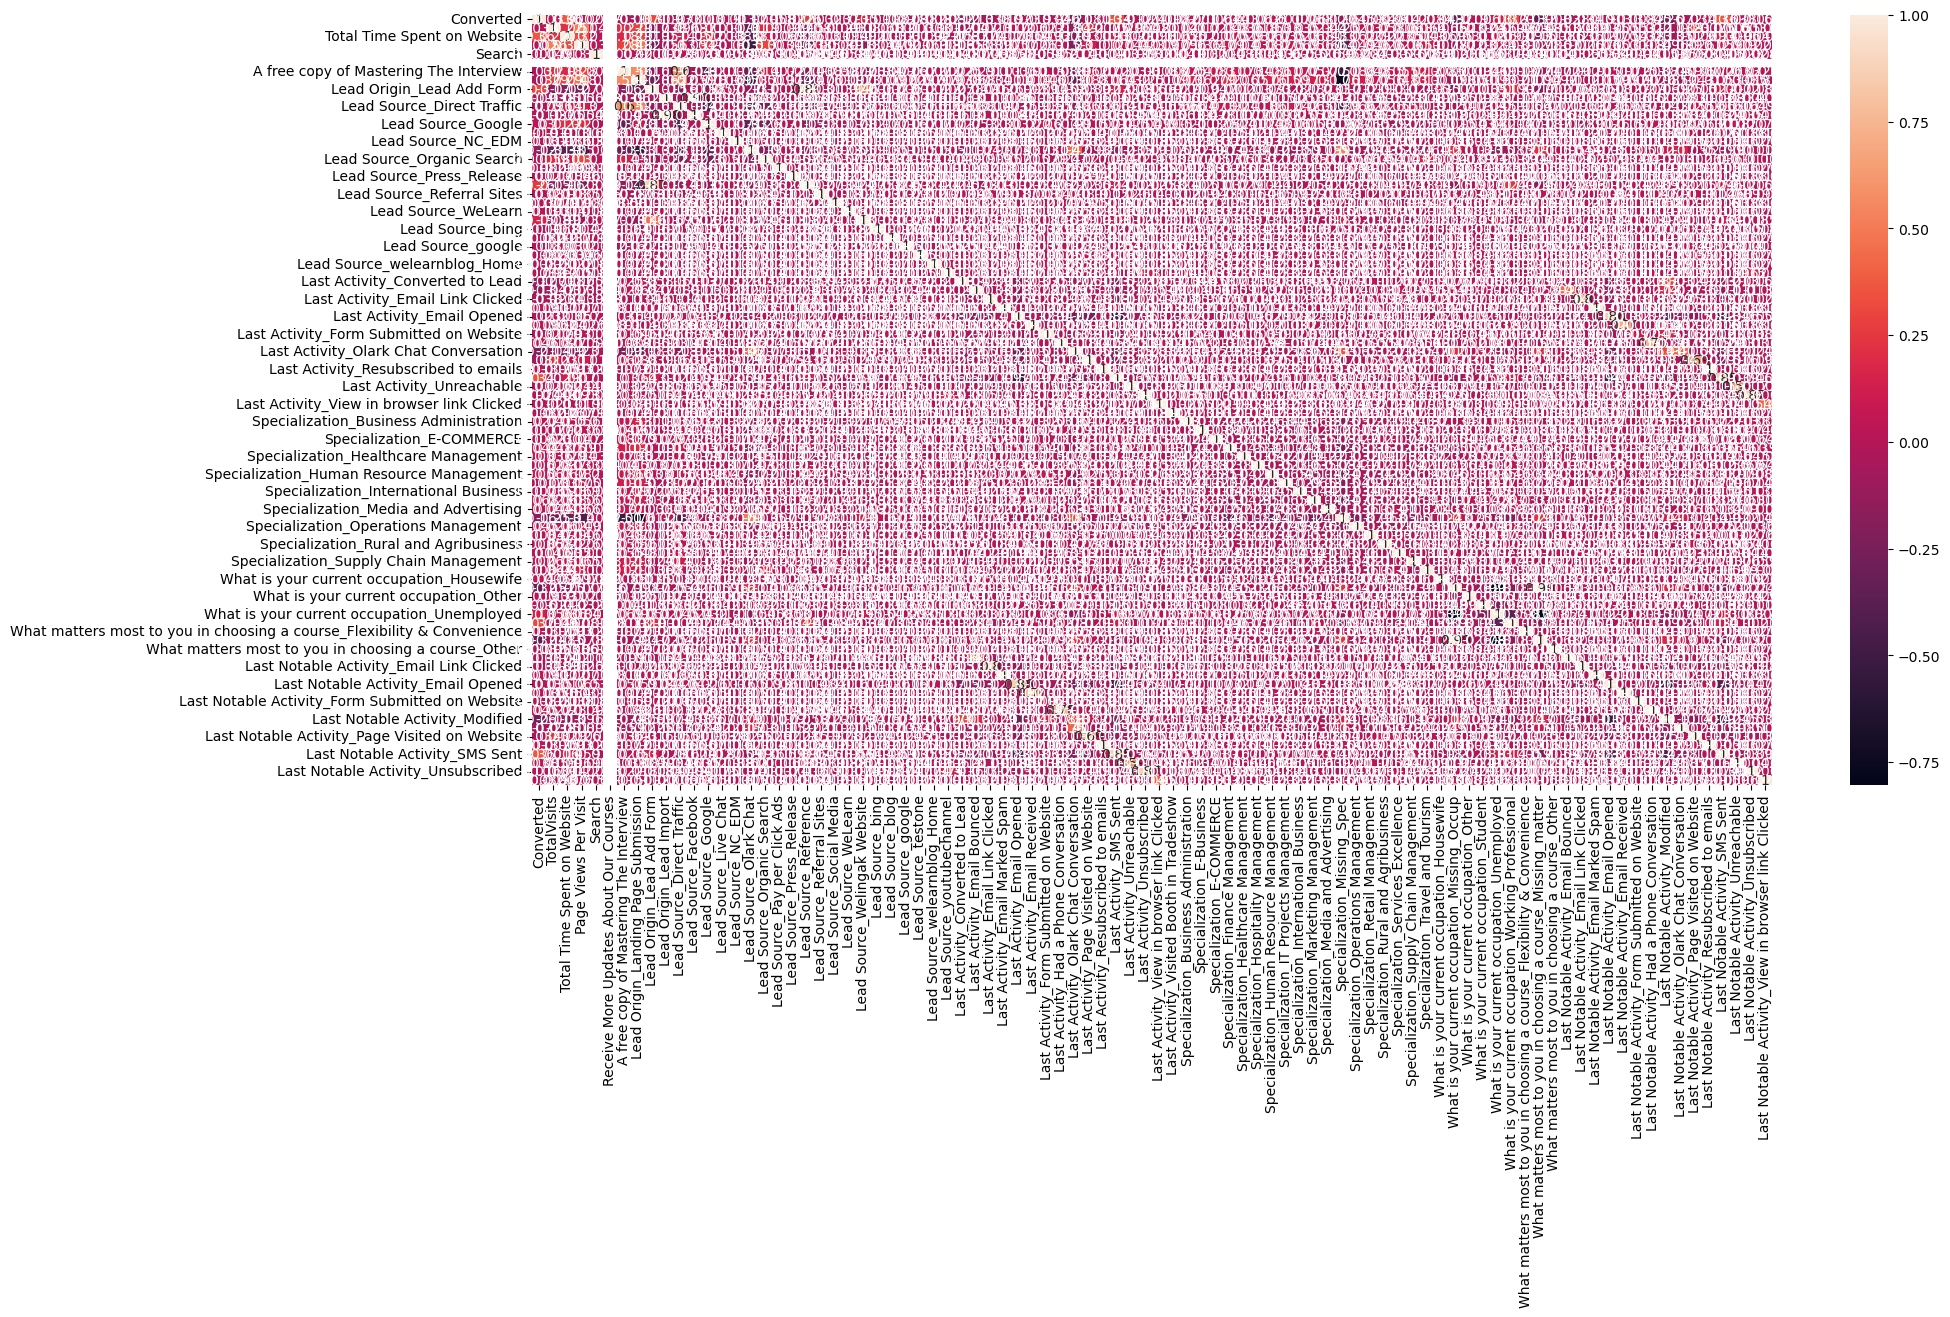

In [89]:
### Step 6: Looking at Correlations
# LET'S SEE THE CORRELATION MATRIX
plt.figure(figsize=(20,10))
sns.heatmap(leads_final.corr(),annot=True)
plt.show()

In [90]:
## WE CANNOT IDENTIFY ANYTHING FROM THIS HEAT MAP SO WE PEROCEES WITH THIS SINCE THERE ARE A LOT OF VARIABLES 

In [91]:
#

In [92]:
#

## Running Your First Training Model

In [93]:
# Logistic regression model
import statsmodels.api as sm

In [94]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6268
Model Family:                Binomial   Df Model:                           82
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2478.4
Date:                Tue, 11 Jul 2023   Deviance:                       4956.9
Time:                        20:15:07   Pearson chi2:                 6.15e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4245
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      26.7644   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
TotalVisits                                                                10.4071      3.223      3.229      0.001       4.090      16.724
Total Time Spent on Website                                                 4.6093      0.172     26.745      0.000       4.272       4.947
Page Views Per Visit                                                       -1.9255      0.628     -3.068      0.002      -3.156      -0.695
Search                                                                      0.1597      0.901      0.177      0.859      -1.606       1.925
Receive More Updates About Our Courses                                  -2.108e-09   1.73e-05     -0.000      1.000   -3.39e-05    3.39e-05
A free copy of Mastering The Interview                                     -0.1737      0.112     -1.552      0.121      -0.393       0.046
Lead Origin_Landing Page Submission                                        -0.7848      0.142     -5.534      0.000      -1.063      -0.507
Lead Origin_Lead Add Form                                                  -0.9901      1.504     -0.658      0.510      -3.938       1.958
Lead Origin_Lead Import                                                    24.7574   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Direct Traffic                                                 -2.6952      1.983     -1.359      0.174      -6.581       1.191
Lead Source_Facebook                                                      -26.4823   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Google                                                         -2.4021      1.980     -1.213      0.225      -6.284       1.479
Lead Source_Live Chat                                                      23.7067   9.26e+04      0.000      1.000   -1.82e+05    1.82e+05
Lead Source_NC_EDM                                                         22.9824   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Olark Chat                                                     -1.3066      1.973     -0.662      0.508      -5.174       2.561
Lead Source_Organic Search                                                 -2.5552      1.984     -1.288      0.198      -6.443       1.333
Lead Source_Pay per Click Ads                                             -25.3579   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Press_Release                                                 -25.0931   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lea

In [95]:
#afsdvsdvsvsvSVF

# Feature Selection Using RFE

In [96]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select= 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)
rfe

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [97]:
 rfe.support_

array([ True,  True, False, False, False, False,  True,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False])

In [98]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('Search', False, 54),
 ('Receive More Updates About Our Courses', False, 73),
 ('A free copy of Mastering The Interview', False, 53),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 45),
 ('Lead Source_Direct Traffic', False, 19),
 ('Lead Source_Facebook', False, 46),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Live Chat', False, 36),
 ('Lead Source_NC_EDM', False, 9),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 20),
 ('Lead Source_Pay per Click Ads', False, 38),
 ('Lead Source_Press_Release', False, 42),
 ('Lead Source_Reference', False, 3),
 ('Lead Source_Referral Sites', False, 21),
 ('Lead Source_Social Media', False, 32),
 ('Lead Source_WeLearn', False, 72),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 67),
 ('Lead Source_blog',

In [99]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

In [100]:
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'Search',
       'Receive More Updates About Our Courses',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_R

### Now you have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [101]:
X_train.shape

(6351, 87)

In [102]:
X_train = X_train[col]

In [103]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

#X_train_sm = sm.add_constant(X_train)
#logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
#res = logm2.fit()
#res.summary()

In [104]:
## Fit the X_train data in the by adding constant
X_train_sm = sm.add_constant(X_train)
# Running the logistic  model
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
#Fit the model
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2604.6
Date:                Tue, 11 Jul 2023   Deviance:                       5209.3
Time:                        20:15:19   Pearson chi2:                 6.25e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4012
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -2.0526      0.103    -19.971      0.000      -2.254      -1.851
TotalVisits                                                      7.0822      2.126      3.332      0.001       2.916      11.248
Total Time Spent on Website                                      4.6425      0.165     28.061      0.000       4.318       4.967
Lead Origin_Landing Page Submission                             -0.3850      0.089     -4.345      0.000      -0.559      -0.211
Lead Origin_Lead Add Form                                        3.4528      0.231     14.949      0.000       3.000       3.905
Lead Source_Olark Chat                                           1.3650      0.125     10.893      0.000       1.119       1.611
Lead Source_Welingak Website                                     1.9812      0.755      2.623      0.009       0.501       3.462
Last Activity_Email Bounced                                     -2.0188      0.374     -5.393      0.000      -2.753      -1.285
Last Activity_Had a Phone Conversation                           0.9587      1.062      0.903      0.366      -1.122       3.039
Last Activity_Olark Chat Conversation                           -1.3692      0.165     -8.279      0.000      -1.693      -1.045
Last Activity_SMS Sent                                           1.2525      0.075     16.791      0.000       1.106       1.399
What is your current occupation_Housewife                       22.9022   1.56e+04      0.001      0.999   -3.05e+04    3.05e+04
What is your current occupation_Working Professional             2.5057      0.187     13.382      0.000       2.139       2.873
What matters most to you in choosing a course_Missing_matter    -1.3282      0.088    -15.132      0.000      -1.500      -1.156
Last Notable Activity_Had a Phone Conversation                   2.7529      1.550      1.776      0.076      -0.286       5.791
Last Notable Activity_Unreachable                                2.0858      0.489      4.267      0.000       1.128       3.044
================================================================================================================================
"""

- Since there are quite a few variable which have a p-value greater than `0.05`. We will have to drop them 

In [105]:
## Looking at Variance Inflation factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
7              Last Activity_Had a Phone Conversation  3.41
13     Last Notable Activity_Had a Phone Conversation  3.40
2                 Lead Origin_Landing Page Submission  2.23
1                         Total Time Spent on Website  1.91
0                                         TotalVisits  1.55
4                              Lead Source_Olark Chat  1.55
9                              Last Activity_SMS Sent  1.55
3                           Lead Origin_Lead Add Form  1.51
12  What matters most to you in choosing a course_...  1.47
8               Last Activity_Olark Chat Conversation  1.41
5                        Lead Source_Welingak Website  1.33
11  What is your current occupation_Working Profes...  1.20
6                         Last Activity_Email Bounced  1.07
10          What is your current occupation_Housewife  1.01
14                  Last Notable Activity_Unreachable  1.01

In [106]:
##let's first drop the variable "What is your current occupation_Housewife" since it has a high p-value  is high we will 
X_train.drop("What is your current occupation_Housewife",axis=1,inplace=True)

In [107]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2609.3
Date:                Tue, 11 Jul 2023   Deviance:                       5218.6
Time:                        20:15:19   Pearson chi2:                 6.27e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4003
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -2.0465      0.103    -19.941      0.000      -2.248      -1.845
TotalVisits                                                      7.0168      2.119      3.311      0.001       2.863      11.170
Total Time Spent on Website                                      4.6404      0.165     28.081      0.000       4.317       4.964
Lead Origin_Landing Page Submission                             -0.3821      0.088     -4.318      0.000      -0.556      -0.209
Lead Origin_Lead Add Form                                        3.4734      0.231     15.060      0.000       3.021       3.925
Lead Source_Olark Chat                                           1.3623      0.125     10.879      0.000       1.117       1.608
Lead Source_Welingak Website                                     1.9569      0.755      2.591      0.010       0.476       3.437
Last Activity_Email Bounced                                     -2.0237      0.374     -5.407      0.000      -2.757      -1.290
Last Activity_Had a Phone Conversation                           0.9536      1.061      0.899      0.369      -1.126       3.034
Last Activity_Olark Chat Conversation                           -1.3722      0.165     -8.298      0.000      -1.696      -1.048
Last Activity_SMS Sent                                           1.2468      0.075     16.725      0.000       1.101       1.393
What is your current occupation_Working Professional             2.5002      0.187     13.355      0.000       2.133       2.867
What matters most to you in choosing a course_Missing_matter    -1.3309      0.088    -15.170      0.000      -1.503      -1.159
Last Notable Activity_Had a Phone Conversation                   2.7520      1.550      1.775      0.076      -0.286       5.790
Last Notable Activity_Unreachable                                2.0810      0.489      4.257      0.000       1.123       3.039
================================================================================================================================
"""

In [108]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
7              Last Activity_Had a Phone Conversation  3.41
12     Last Notable Activity_Had a Phone Conversation  3.40
2                 Lead Origin_Landing Page Submission  2.23
1                         Total Time Spent on Website  1.91
0                                         TotalVisits  1.55
4                              Lead Source_Olark Chat  1.55
9                              Last Activity_SMS Sent  1.54
3                           Lead Origin_Lead Add Form  1.51
11  What matters most to you in choosing a course_...  1.47
8               Last Activity_Olark Chat Conversation  1.41
5                        Lead Source_Welingak Website  1.33
10  What is your current occupation_Working Profes...  1.20
6                         Last Activity_Email Bounced  1.07
13                  Last Notable Activity_Unreachable  1.01

In [109]:
#Dropping "Last Activity_Had a Phone Conversation" since the P value is greater than 0.05

In [110]:
X_train.drop("Last Activity_Had a Phone Conversation",axis=1,inplace=True)

In [111]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2609.7
Date:                Tue, 11 Jul 2023   Deviance:                       5219.4
Time:                        20:15:19   Pearson chi2:                 6.27e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4002
Covariance Type:            nonrobust                                         
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------

In [112]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                 Lead Origin_Landing Page Submission  2.23
1                         Total Time Spent on Website  1.91
0                                         TotalVisits  1.55
4                              Lead Source_Olark Chat  1.55
8                              Last Activity_SMS Sent  1.54
3                           Lead Origin_Lead Add Form  1.51
10  What matters most to you in choosing a course_...  1.47
7               Last Activity_Olark Chat Conversation  1.41
5                        Lead Source_Welingak Website  1.33
9   What is your current occupation_Working Profes...  1.20
6                         Last Activity_Email Bounced  1.07
12                  Last Notable Activity_Unreachable  1.01
11     Last Notable Activity_Had a Phone Conversation  1.00

- All the P VALUE AND Vif are in the specified range no need to drop any variable 

## Model Evaluation

In [113]:
## PREDICTION 

In [114]:
# Use 'predict' to predict the probabilities on the train set
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

3009    0.053354
1012    0.055517
9226    0.636938
4750    0.603151
7987    0.905534
1281    0.727368
2880    0.024908
4971    0.929011
7536    0.862551
1248    0.880254
dtype: float64

In [115]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.05335366, 0.05551733, 0.63693843, 0.60315066, 0.90553399,
       0.72736777, 0.02490801, 0.92901075, 0.86255089, 0.88025439])

In [116]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Conversion_Prob
0          0         0.053354
1          0         0.055517
2          0         0.636938
3          1         0.603151
4          1         0.905534

In [117]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted
0          0         0.053354          0
1          0         0.055517          0
2          0         0.636938          1
3          1         0.603151          1
4          1         0.905534          1

# Model Evaluation 

In [118]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3465  440]
 [ 743 1703]]


In [119]:
# Predicted     not_churn    churn
# Actual
# not_churn        3465       440
# churn             743      1703

In [120]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8137301212407495


In [121]:
## 81% is a accuracy is a a very good value 

In [122]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [123]:
# Calculate the sensitivity

TP/(TP+FN)

0.696238757154538

In [124]:
# Calculate the specificity

TN/(TN+FP)

0.8873239436619719

### Finding the Optimal Cutoff

Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [125]:
y_train_pred_final

Converted  Conversion_Prob  Predicted
0             0         0.053354          0
1             0         0.055517          0
2             0         0.636938          1
3             1         0.603151          1
4             1         0.905534          1
...         ...              ...        ...
6346          0         0.175317          0
6347          1         0.860062          1
6348          0         0.935386          1
6349          0         0.209098          0
6350          0         0.508522          1

[6351 rows x 3 columns]

In [126]:

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [127]:
fpr, tpr, thresholds=metrics.roc_curve(y_train_pred_final.Converted,y_train_pred_final.Conversion_Prob,drop_intermediate = False)

0.8870445149152553

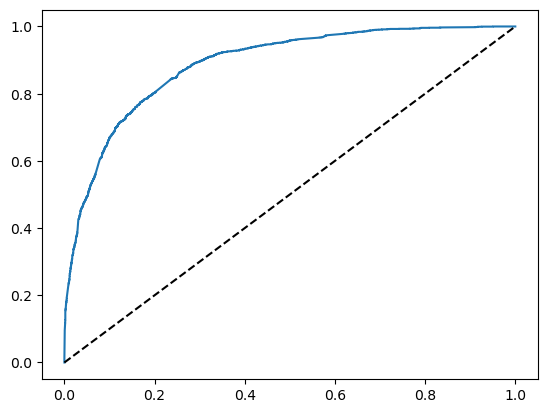

In [128]:
## area under the curve
auc_score=metrics.roc_auc_score(y_train_pred_final.Converted,y_train_pred_final.Conversion_Prob)
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
auc_score

- The area under the curve of the ROC is 0.86 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

## FINDINF OPTIMAL CUTOFF

In [129]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.053354          0    1    0    0    0    0    0    0   
1          0         0.055517          0    1    0    0    0    0    0    0   
2          0         0.636938          1    1    1    1    1    1    1    1   
3          1         0.603151          1    1    1    1    1    1    1    1   
4          1         0.905534          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    1    1    1

# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

In [130]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

In [131]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
        cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
cm1

array([[3854,   51],
       [1783,  663]], dtype=int64)

In [132]:
sum(sum(cm1))

6351

In [133]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
        cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
        total1=sum(sum(cm1))  ## sum of all the cofusion matrix sum
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)


     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.592977  0.984056  0.348015
0.2   0.2  0.760983  0.916599  0.663508
0.3   0.3  0.786805  0.870401  0.734443
0.4   0.4  0.809794  0.760834  0.840461
0.5   0.5  0.813730  0.696239  0.887324
0.6   0.6  0.804125  0.631643  0.912164
0.7   0.7  0.779090  0.514718  0.944686
0.8   0.8  0.759880  0.428455  0.967478
0.9   0.9  0.711227  0.271055  0.986940


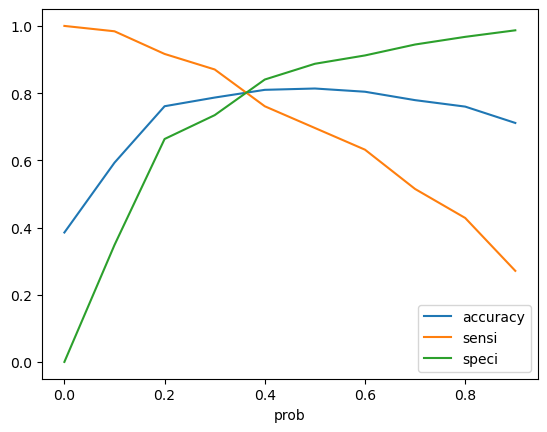

In [134]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [135]:
## Considering the threeshold to be 0.35 i.e the point of intersection

In [136]:
y_train_pred_final["final_predicted"]=y_train_pred_final.Conversion_Prob.map(lambda x : 1 if x > 0.35 else 0)

In [137]:
y_train_pred_final.head(10)

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.053354          0    1    0    0    0    0    0    0   
1          0         0.055517          0    1    0    0    0    0    0    0   
2          0         0.636938          1    1    1    1    1    1    1    1   
3          1         0.603151          1    1    1    1    1    1    1    1   
4          1         0.905534          1    1    1    1    1    1    1    1   
5          1         0.727368          1    1    1    1    1    1    1    1   
6          0         0.024908          0    1    0    0    0    0    0    0   
7          1         0.929011          1    1    1    1    1    1    1    1   
8          1         0.862551          1    1    1    1    1    1    1    1   
9          0         0.880254          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                1  
3    0    0    0                1  
4    1    1    1                1  
5    1    0    0                1  
6    0    0    0                0  
7    1    1    1                1  
8    1    1    0                1  
9    1    1    0                1

In [138]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.80286569044245

In [139]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3154,  751],
       [ 501, 1945]], dtype=int64)

In [140]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [141]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7951757972199509

In [142]:
# Let us calculate specificity
TN / float(TN+FP)

0.8076824583866837

In [143]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.19231754161331627


In [144]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7214391691394659


In [145]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8629274965800273


## PRECISION AND RECALL 

In [146]:
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.053354          0    1    0    0    0    0    0    0   
1          0         0.055517          0    1    0    0    0    0    0    0   
2          0         0.636938          1    1    1    1    1    1    1    1   
3          1         0.603151          1    1    1    1    1    1    1    1   
4          1         0.905534          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                1  
3    0    0    0                1  
4    1    1    1                1

In [147]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3465,  440],
       [ 743, 1703]], dtype=int64)

##### Precision
TP / TP + FP

In [148]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7946803546430238

##### Recall     OF ALL THE TRUES HOW MANY DID YOU DETECT
TP / TP + FN

In [149]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.696238757154538

In [150]:
from sklearn.metrics import precision_score , recall_score

In [151]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7946803546430238

In [152]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.696238757154538

In [153]:
## Precision Recall Curve

In [154]:
from sklearn.metrics import precision_recall_curve

In [155]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    1
 Name: Predicted, Length: 6351, dtype: int64)

In [156]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

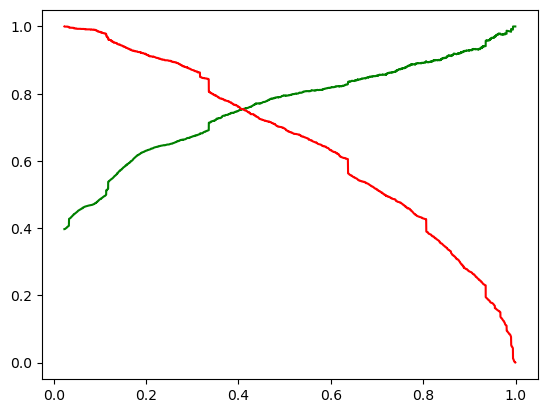

In [157]:
plt.plot(thresholds,p[:-1],"g-")
plt.plot(thresholds,r[:-1],"r-")

In [158]:
## Considering the Threshold tobe 0.4

In [159]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)


In [160]:
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.053354          0    1    0    0    0    0    0    0   
1          0         0.055517          0    1    0    0    0    0    0    0   
2          0         0.636938          1    1    1    1    1    1    1    1   
3          1         0.603151          1    1    1    1    1    1    1    1   
4          1         0.905534          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                1  
3    0    0    0                1  
4    1    1    1                1

In [161]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8097937332703511

In [162]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3282,  623],
       [ 585, 1861]], dtype=int64)

In [163]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [164]:
# Calculate Precision

TP/(TP+FP)

0.749194847020934

In [165]:
# Calculate Recall

TP/(TP+FN)

0.7608340147179068

## Making Predictions on the Test Set


In [166]:
X_test.shape

(2723, 87)

In [167]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [168]:
X_test = X_test[col]
X_test.head()

TotalVisits  Total Time Spent on Website  \
3271     0.015936                     0.070530   
1490     0.019920                     0.679695   
7936     0.007968                     0.033243   
4216     0.000000                     0.000000   
3830     0.031873                     0.073675   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
3271                                    0                          0   
1490                                    1                          0   
7936                                    0                          0   
4216                                    0                          1   
3830                                    1                          0   

      Lead Source_Olark Chat  Lead Source_Welingak Website  \
3271                       0                             0   
1490                       0                             0   
7936                       0                             0   
4216                       0                             0   
3830                       0                             0   

      Last Activity_Email Bounced  Last Activity_Had a Phone Conversation  \
3271                            0                                       0   
1490                            0                                       0   
7936                            0                                       0   
4216                            0                                       0   
3830                            0                                       0   

      Last Activity_Olark Chat Conversation  Last Activity_SMS Sent  \
3271                                      0                       0   
1490                                      0                       0   
7936                                      0                       0   
4216                                      0                       0   
3830                                      0                       0   

      What is your current occupation_Housewife  \
3271                                          0   
1490                                          0   
7936                                          0   
4216                                          0   
3830                                          0   

      What is your current occupation_Working Professional  \
3271                                                  0      
1490                                                  1      
7936                                                  0      
4216                                                  0      
3830                                                  0      

      What matters most to you in choosing a course_Missing_matter  \
3271                                                  1              
1490                                                  0              
7936                                                  1              
4216                                                  0              
3830                                                  1              

      Last Notable Activity_Had a Phone Conversation  \
3271                                               0   
1490                                               0   
7936                                               0   
4216                                               0   
3830                                               0   

      Last Notable Activity_Unreachable  
3271                                  0  
1490                                  0  
7936                                  0  
4216                                  0  
3830                                  0

In [169]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [170]:
# Check X_test_sm

X_test_sm

const  TotalVisits  Total Time Spent on Website  \
3271    1.0     0.015936                     0.070530   
1490    1.0     0.019920                     0.679695   
7936    1.0     0.007968                     0.033243   
4216    1.0     0.000000                     0.000000   
3830    1.0     0.031873                     0.073675   
...     ...          ...                          ...   
850     1.0     0.011952                     0.372417   
2879    1.0     0.007968                     0.264600   
6501    1.0     0.031873                     0.599730   
7155    1.0     0.011952                     0.231357   
376     1.0     0.015936                     0.167116   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
3271                                    0                          0   
1490                                    1                          0   
7936                                    0                          0   
4216                                    0                          1   
3830                                    1                          0   
...                                   ...                        ...   
850                                     1                          0   
2879                                    1                          0   
6501                                    1                          0   
7155                                    1                          0   
376                                     1                          0   

      Lead Source_Olark Chat  Lead Source_Welingak Website  \
3271                       0                             0   
1490                       0                             0   
7936                       0                             0   
4216                       0                             0   
3830                       0                             0   
...                      ...                           ...   
850                        0                             0   
2879                       0                             0   
6501                       0                             0   
7155                       0                             0   
376                        0                             0   

      Last Activity_Email Bounced  Last Activity_Had a Phone Conversation  \
3271                            0                                       0   
1490                            0                                       0   
7936                            0                                       0   
4216                            0                                       0   
3830                            0                                       0   
...                           ...                                     ...   
850                             0                                       0   
2879                            0                                       0   
6501                            0                                       0   
7155                            0                                       0   
376                             0                                       0   

      Last Activity_Olark Chat Conversation  Last Activity_SMS Sent  \
3271                                      0                       0   
1490                                      0                       0   
7936                                      0                       0   
4216                                      0                       0   
3830                                      0                       0   
...                                     ...                     ...   
850                                       0                       0   
2879                                      0                       0   
6501                                      0                       1   
7155                                      0                       0   
376  

In [171]:
X_test.drop(["What is your current occupation_Housewife", "Last Activity_Had a Phone Conversation"],axis= 1, inplace = True)

In [172]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [173]:
y_test_pred[:10]

3271    0.050412
1490    0.966624
7936    0.040509
4216    0.806498
3830    0.039405
1800    0.598192
6507    0.303788
4821    0.278989
4223    0.935386
4714    0.316437
dtype: float64

In [174]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [175]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [176]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [177]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [178]:
# Check 'y_pred_final'

y_pred_final.head()

Converted         0
0          0  0.050412
1          1  0.966624
2          0  0.040509
3          1  0.806498
4          0  0.039405

In [179]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [180]:
# Let's see the head of y_pred_final

y_pred_final.head()

Converted  Conversion_Prob
0          0         0.050412
1          1         0.966624
2          0         0.040509
3          1         0.806498
4          0         0.039405

In [181]:
# Make predictions on the test set using 0.4 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [182]:
# Check y_pred_final

y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          0         0.050412                0
1          1         0.966624                1
2          0         0.040509                0
3          1         0.806498                1
4          0         0.039405                0

In [183]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8082996694821888

In [184]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1423,  311],
       [ 211,  778]], dtype=int64)

In [185]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [186]:
# Calculate sensitivity
TP / float(TP+FN)

0.7866531850353893

In [187]:
# Calculate specificity
TN / float(TN+FP)

0.8206459054209919

## Test Set prediction for precison and recall 

In [188]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [189]:
y_test_pred[:10]

3271    0.050412
1490    0.966624
7936    0.040509
4216    0.806498
3830    0.039405
1800    0.598192
6507    0.303788
4821    0.278989
4223    0.935386
4714    0.316437
dtype: float64

In [190]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [191]:
y_pred_1.head()

0
3271  0.050412
1490  0.966624
7936  0.040509
4216  0.806498
3830  0.039405

In [192]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [193]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [194]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [195]:
# Check 'y_pred_final'

y_pred_final.head()

Converted         0
0          0  0.050412
1          1  0.966624
2          0  0.040509
3          1  0.806498
4          0  0.039405

In [196]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [197]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [198]:
# Check y_pred_final

y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          0         0.050412                0
1          1         0.966624                1
2          0         0.040509                0
3          1         0.806498                1
4          0         0.039405                0

In [199]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8189496878442893

In [200]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1476,  258],
       [ 235,  754]], dtype=int64)

In [201]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]TA

In [202]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7450592885375494

In [203]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7623862487360971